# <span style="color:blue">**HEALTHCARE DATA ANALYSIS: PREDICTING HOSPITAL READMISSION RATES**</SPAN>


## **Project Overview:**

### **Introduction:**
This project focuses on analyzing and predicting readmission rates of diabetic patients using the "Diabetes 130-US hospitals for years 1999-2008" dataset. Readmission refers to the return of patients to the hospital within a certain period after their initial discharge. Understanding the factors that contribute to readmission and developing a predictive model can assist healthcare providers in implementing targeted interventions and improving patient outcomes.

### **Problem Statement:**
The problem addressed in this project is to develop a predictive model that accurately estimates the likelihood of readmission for diabetic patients. By identifying the factors associated with readmission, healthcare providers can proactively intervene and provide appropriate care to reduce readmission rates and enhance patient management.

### **Objectives:**
The main objectives of this project are as follows:

Exploratory Data Analysis (EDA): Perform a comprehensive analysis of the "Diabetes 130-US hospitals for years 1999-2008" dataset to gain insights into patient demographics, medical history, medications, and other relevant factors. Identify patterns, trends, and correlations within the data.

Feature Engineering and Selection: Preprocess the dataset by handling missing values, transforming variables if necessary, and selecting the most relevant features for predicting readmission. This step aims to enhance the quality and relevance of the data for modeling.

Build Predictive Model: Develop a predictive model using appropriate machine learning algorithms to estimate the probability of readmission for diabetic patients. Evaluate and fine-tune the model to achieve optimal performance.

Interpretation and Insights: Interpret the results of the predictive model and provide insights into the factors that significantly impact readmission rates. Identify the most influential variables and their relative importance in predicting readmission.

### **About the Data:**
The "Diabetes 130-US hospitals for years 1999-2008" dataset contains information from 130 US hospitals and covers a time period spanning from 1999 to 2008. It includes various features such as patient demographics (e.g., age, gender, race), medical history (e.g., previous diagnoses, procedures), medications, and laboratory results. The dataset consists of over 100,000 instances, providing a substantial amount of data for analysis and modeling. Additionally, the dataset includes a weight column that can be utilized for further analysis or modeling purposes. The dataset can be accessed through the provided link: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

# <span style='color:blue'>**1. Loading Data and libraries**</SPAN>

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import xgboost

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier


from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sympy.abc import y



In [5]:
# import display that can display maximum columns and rows
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)

In [6]:
# loading dataset
data = pd.read_csv("data/diabetic_data.csv")
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


> <span style='color:yellow'>**Creating a class that will help to understannd the dataset**</SPAN>

In [5]:
# Build a class that will understand datase

class dataanalyzer:
    # initialize the class
    def __init__(self, data):
        self.data = data

    # calculate percentage of missing values
    def calculate_missing_percentage(self):
        missing_values_perce = (self.data.isnull().sum()/len(self.data))*100
        return missing_values_perce

    # Calculate percentage of duplicates
    def calculate_duplicates_percentage(self):
        duplicated_perce = (self.data.duplicated().sum()/len(self.data))*100
        return duplicated_perce

    # To displaying shape
    def display_shape(self):
        shape = self.data.shape
        return shape

    # Displaying info
    def display_info(self):
        info = self.data.info()
        return info

    # Display the description
    def display_describe(self):
        describe = self.data.describe()
        return describe

In [6]:
# Instantiating the class
analyzer = dataanalyzer(data)

In [7]:
# Check for the missing values
missing_val_perce = analyzer.calculate_missing_percentage()
print(missing_val_perce)

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburid

In [8]:
# Check for the shape
shape = analyzer.display_shape()
print(shape)

(101766, 50)


In [9]:
# Check for the general information of the dataset
info = analyzer.display_info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [10]:
# Check the number of duplicated values/entries
duplicated = analyzer.calculate_duplicates_percentage()
print(duplicated)

0.0


In [11]:
# Examine the columns in the dataset
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In the dataset we have entries with `?` that we will replace with `NaN`

In [12]:
# Define a simple function to replace '?' to 'NaN'
def replace_question_mark(data):
    for column in data.columns:
        data[column] = data[column].replace('?',np.nan)
    return data
replace_question_mark(data)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [13]:
# Check the percentage of the missing values
missing_val_perce = analyzer.calculate_missing_percentage()
print("The percentage of the missing values is:","\n")
print(missing_val_perce)

The percentage of the missing values is: 

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repagli

> <span style='color:yellow'>**Creating a function that will help to clean missing values in the dataset**</SPAN>

In [14]:
# Check the percentage of the missing values
def print_missing_values(data):

    # Get columns with missing values
    columns_with_missing = data.columns[data.isnull().any()].tolist()

    # Calculate sum and percentage of missing values for each column
    missing_values_sum = data[columns_with_missing].isnull().sum()
    missing_values_percentage = (missing_values_sum / len(data)) * 100

    # Create a table with the missing values information
    missing_values_table = pd.DataFrame({
        'Column': columns_with_missing,
        'Missing Values': missing_values_sum,
        'Percentage': missing_values_percentage
    })

    # Print the table with column names and their respective missing values
    print(f"{'Column':<20} {'Missing Values':<15} {'Percentage':<15}")
    for _, row in missing_values_table.iterrows():
        print(f"{row['Column']:<20} {row['Missing Values']:<15} {row['Percentage']:<15.2f}")

print_missing_values(data)

Column               Missing Values  Percentage     
race                 2273            2.23           
weight               98569           96.86          
payer_code           40256           39.56          
medical_specialty    49949           49.08          
diag_1               21              0.02           
diag_2               358             0.35           
diag_3               1423            1.40           


# <span style='color:green'>**2. Initial Data Exploration**</SPAN>

### **1. Categorical columns**

In [15]:
# Function to display all categorical columns
def print_categorical_columns(df):
    # Find categorical columns
    categorical_columns = df.select_dtypes(include='object').columns

    # Print the column names
    for column in categorical_columns:
        print(column)

print_categorical_columns(data)

race
gender
age
weight
payer_code
medical_specialty
diag_1
diag_2
diag_3
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


There are quite a number of categorical columns and we will creat a function to help in ploting the pie chart and histogram.

Value Counts:
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


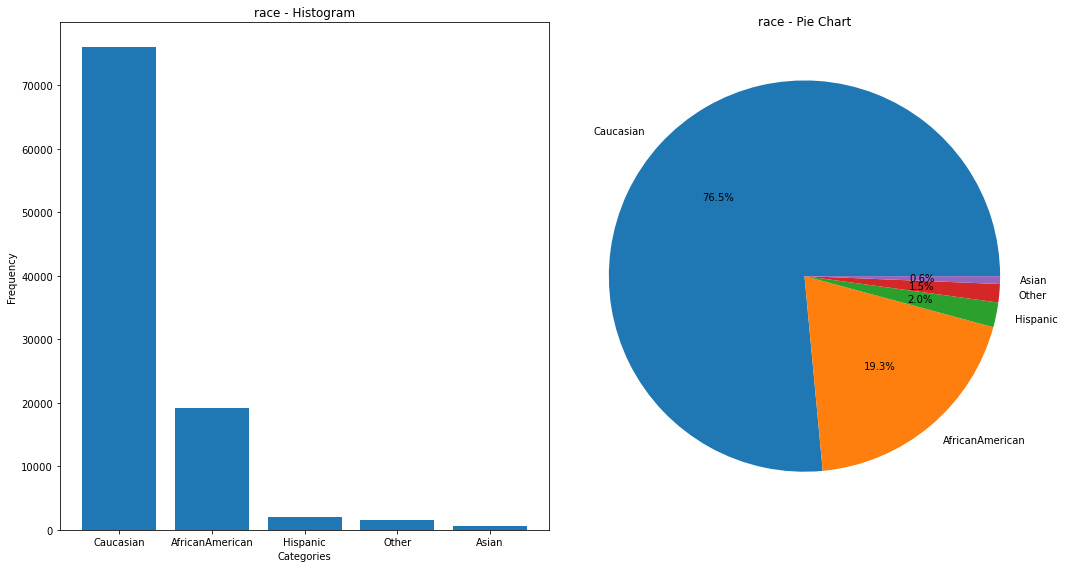

In [16]:
# Function that will plot histogram and pie charts for every column
def plot_histogram_pie(column):
    if isinstance(column, str):
        column = data[column]
    elif not isinstance(column, pd.Series):
        raise ValueError("Invalid input. Please provide a pandas Series or DataFrame column.")

    # Print the values
    print("Value Counts:")
    print(column.value_counts(dropna=False))

    # Plot the histogram and pie chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

    # Plot the histogram
    ax1.bar(column.value_counts().index, column.value_counts().values)
    ax1.set_title(column.name + ' - Histogram')
    ax1.set_xlabel('Categories')
    ax1.set_ylabel('Frequency')

    # Plot the pie chart
    ax2.pie(column.value_counts().values, labels=column.value_counts().index, autopct='%1.1f%%')
    ax2.set_title(column.name + ' - Pie Chart')

    # Display the plots
    plt.tight_layout()
    plt.show()

# Display the race column
plot_histogram_pie('race')


The race distribution in the dataset shows that the majority of patients are Caucasian, accounting for approximately 76,099 instances.

African Americans are the second largest racial group, with 19,210 instances.

Notably, there are 2,273 instances where the race information is missing.

Value Counts:
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


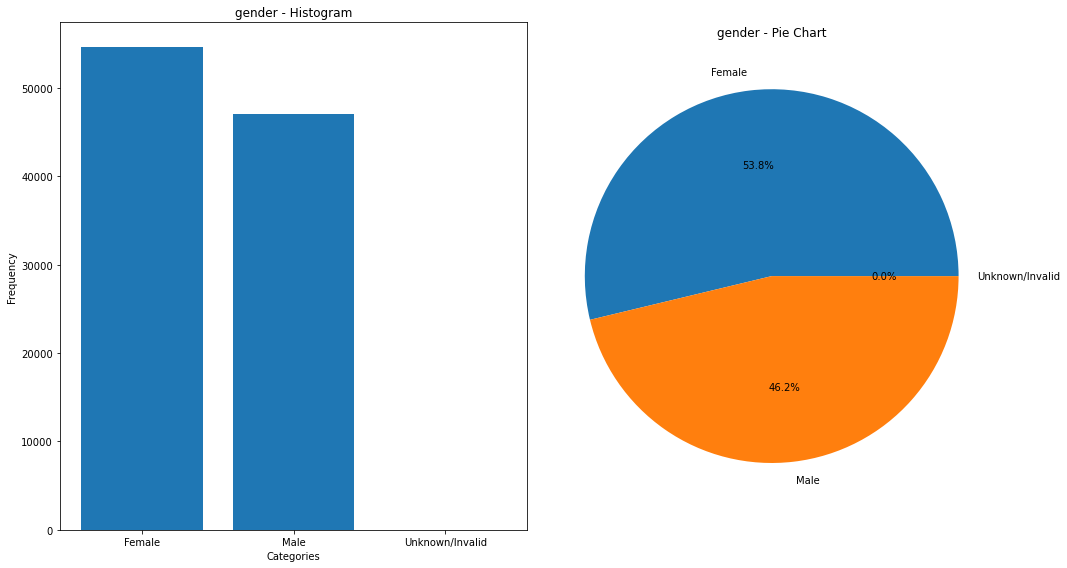

In [17]:
# Display gender
plot_histogram_pie('gender')

The gender distribution in the dataset indicates that there are more female patients, with approximately 54,708 instances.

Male patients follow closely behind with 47,055 instances.

However, there are only three instances where the gender is classified as "Unknown/Invalid."

Value Counts:
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


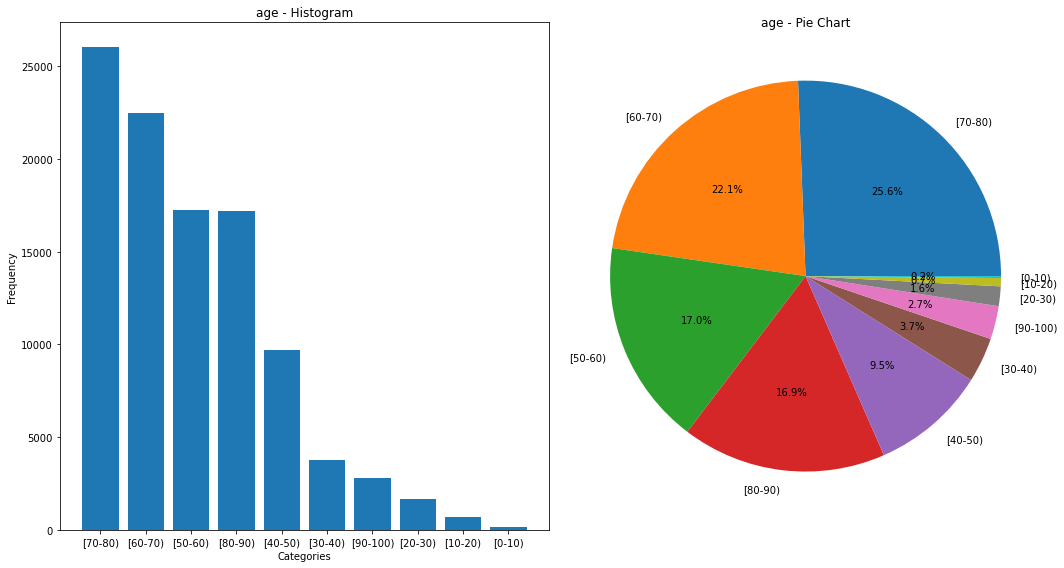

In [18]:
# Display age
plot_histogram_pie('age')

The age distribution in the dataset reveals that the largest patient group falls within the age range of 70-80, with 26,068 instances.

This is followed by the age range of 60-70, which has 22,483 instances.

The distribution shows a gradual decline in the number of instances as the age range decreases, with the smallest group being patients aged 0-10, comprising only 161 instances.

Understanding the age distribution can help in tailoring healthcare interventions and treatment plans according to the specific needs of different age groups.

Value Counts:
NaN          98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64


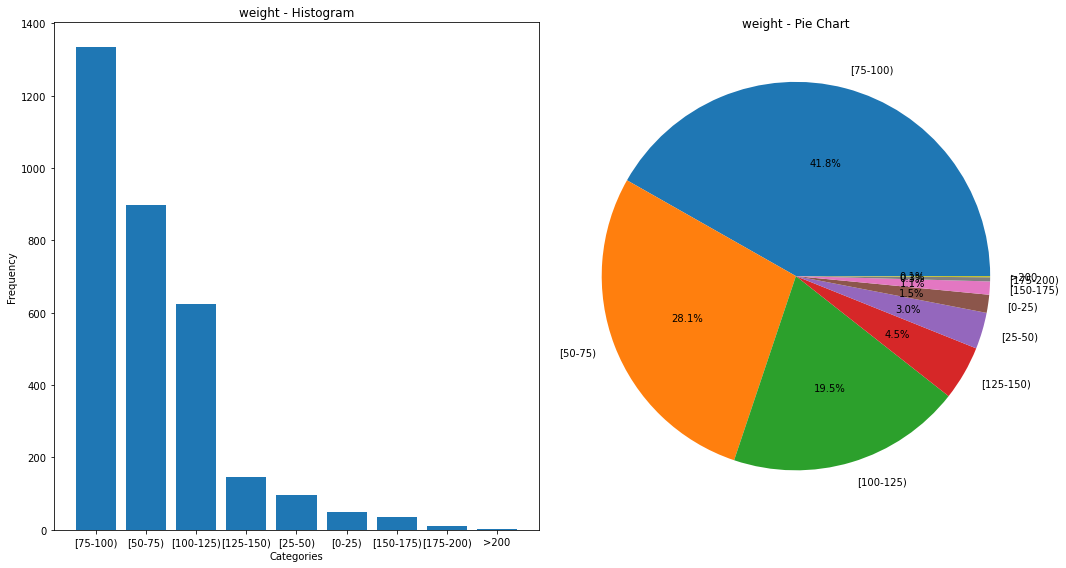

In [19]:
#Dispaly weight
plot_histogram_pie('weight')

The weight column in the dataset has a large number of missing values, with 98,569 instances marked as "Missing".

Among the available weight values, the majority fall within the range of 75-100, with 1,336 instances. There are also smaller numbers of instances in other weight ranges, such as [50-75], [100-125], [125-150], [25-50], [0-25], [150-175], [175-200], and >200.

The high number of missing values in the weight column poses a challenge for analyzing weight-related insights.

Value Counts:
NaN    40256
MC     32439
HM      6274
SP      5007
BC      4655
MD      3532
CP      2533
UN      2448
CM      1937
OG      1033
PO       592
DM       549
CH       146
WC       135
OT        95
MP        79
SI        55
FR         1
Name: payer_code, dtype: int64


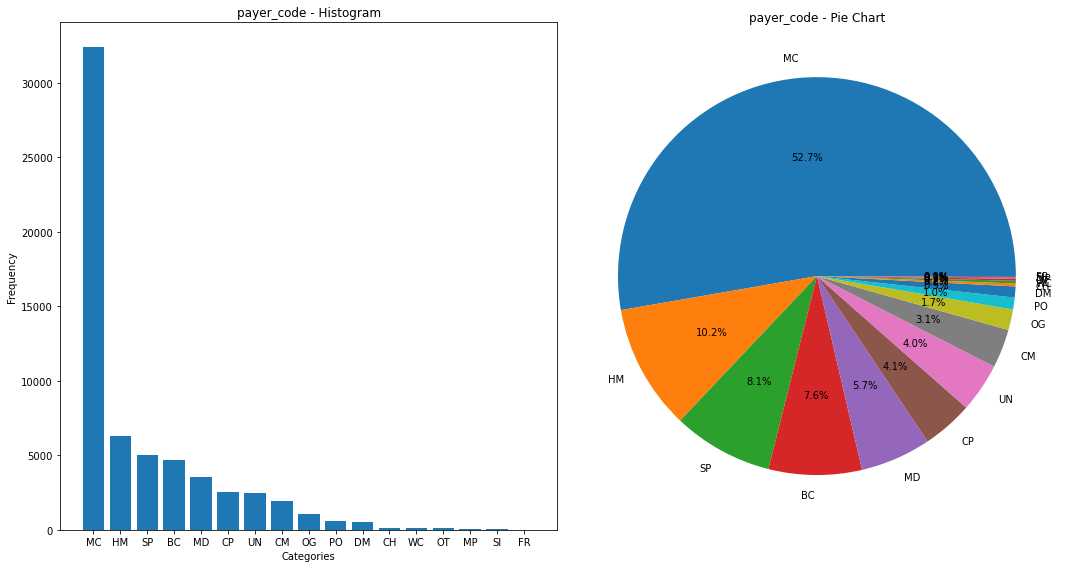

In [20]:
# Display payer_code
plot_histogram_pie('payer_code')

The payer_code column in the dataset exhibits a considerable number of missing values, with 40,256 instances marked as "Missing."

Among the available values, the most frequent payer code is "MC" (Medicare), with 32,439 instances. Other common payer codes include "HM" (Medicaid) with 6,274 instances, "SP" (Sponsored/Charity) with 5,007 instances, and "BC" (Blue Cross/Blue Shield) with 4,655 instances.

The presence of various payer codes indicates the diverse insurance coverage of patients in the dataset, which can have implications for healthcare utilization and reimbursement.

Value Counts:
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


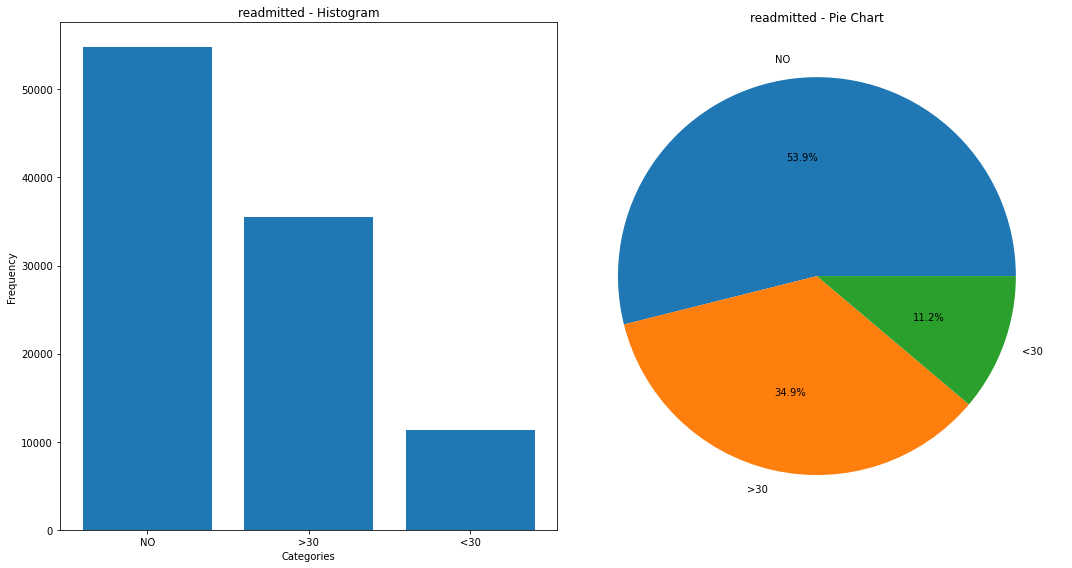

In [21]:
# Display readmitted
plot_histogram_pie('readmitted')

The "readmitted" column in the dataset indicates the readmission status of patients.

The majority of patients, with 54,864 instances, were not readmitted to the hospital. On the other hand, 35,545 instances show patients who were readmitted after 30 days of their initial discharge. Additionally, there are 11,357 instances where patients were readmitted within 30 days.

Understanding the readmission status can help identify factors that contribute to readmission and inform strategies for improving patient care and reducing readmission rates.

Value Counts:
NaN                       49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
                          ...  
Dermatology                   1
Speech                        1
Neurophysiology               1
SportsMedicine                1
Proctology                    1
Name: medical_specialty, Length: 73, dtype: int64


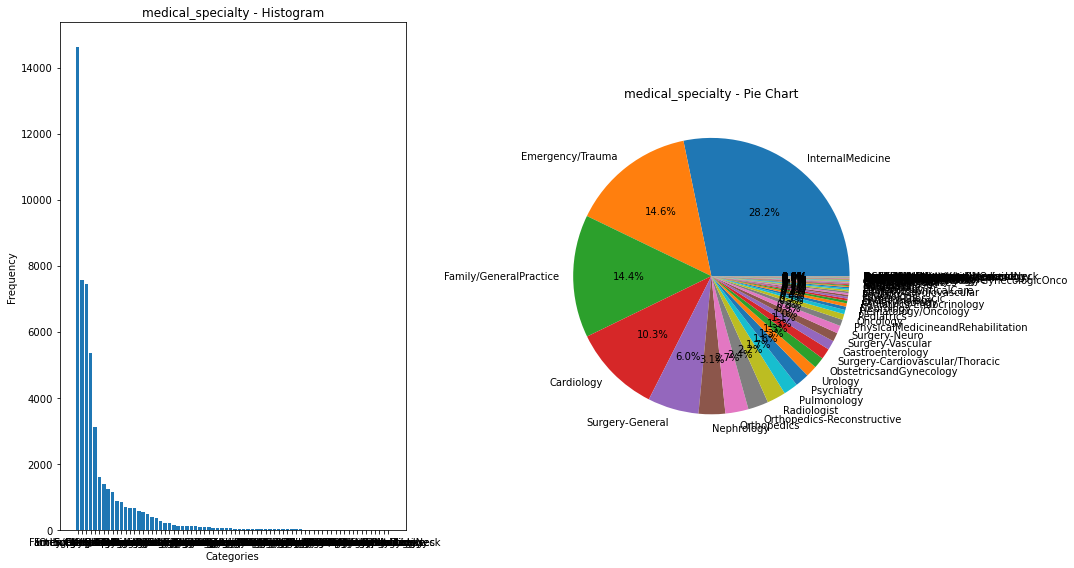

In [22]:
# Display mediacal_speciality
plot_histogram_pie('medical_specialty')

The "medical_specialty" column in the dataset shows a significant number of missing values, with 49,949 instances marked as "Missing."

Among the available values, the most common medical specialty is "InternalMedicine" with 14,635 instances, followed by "Emergency/Trauma" with 7,565 instances and "Family/GeneralPractice" with 7,440 instances.

There are various other medical specialties represented in the dataset, indicating the diverse range of specialties involved in patient care.

Value Counts:
None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64


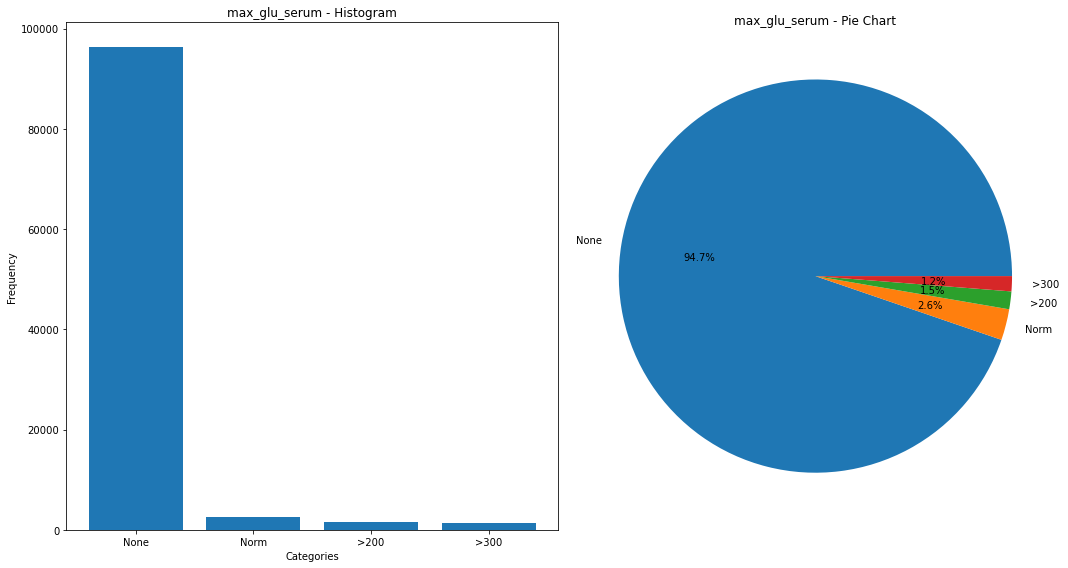

In [23]:
# Display max_glu_serum
plot_histogram_pie('max_glu_serum')

The "max_glu_serum" column in the dataset provides information about the maximum glucose serum test result for patients.

The majority of patients, with 96,420 instances, have a test result of "None," indicating a normal glucose level.

There are also instances where patients have elevated glucose levels, with 2,597 instances classified as "Norm," 1,485 instances with a value greater than 200, and 1,264 instances with a value greater than 300.

Monitoring and understanding glucose levels can be crucial in managing diabetes and other related conditions, and this information can help identify patients who may require additional interventions or treatments.

Value Counts:
None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64


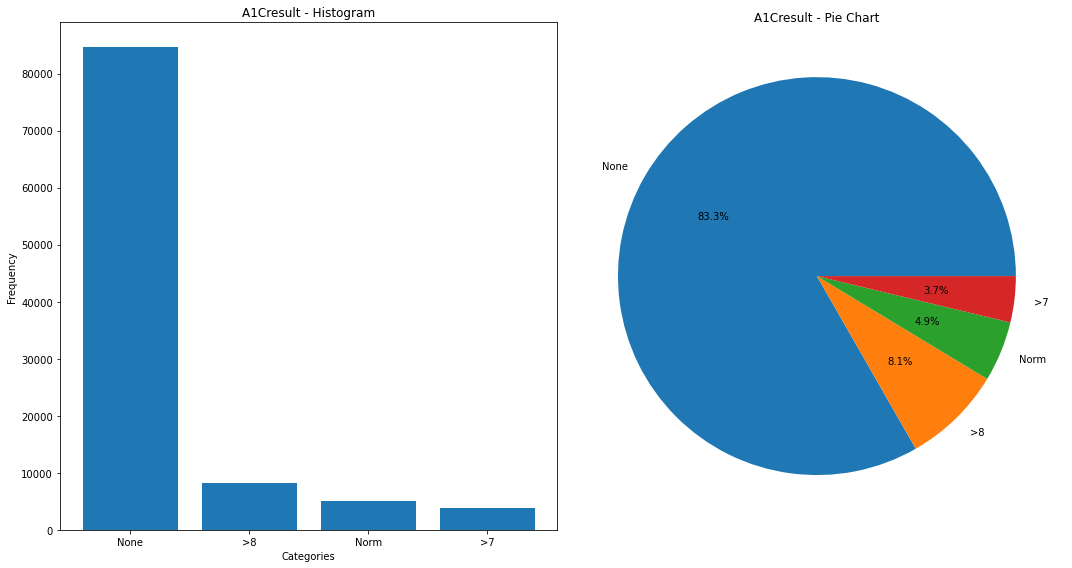

In [24]:
# Display A1Cresult
plot_histogram_pie('A1Cresult')

The "A1Cresult" column in the dataset provides information about the A1C test results for patients, which measures the average blood glucose levels over the past few months.

The majority of patients, with 84,748 instances, have a test result of "None," indicating that an A1C test was not performed or the result is not available.

There are instances where patients have A1C levels above the normal range, with 8,216 instances classified as ">8" and 3,812 instances as ">7."

Additionally, there are 4,990 instances where the A1C result falls within the normal range ("Norm").

Monitoring A1C levels is crucial in managing diabetes and evaluating long-term blood glucose control.

Value Counts:
No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64


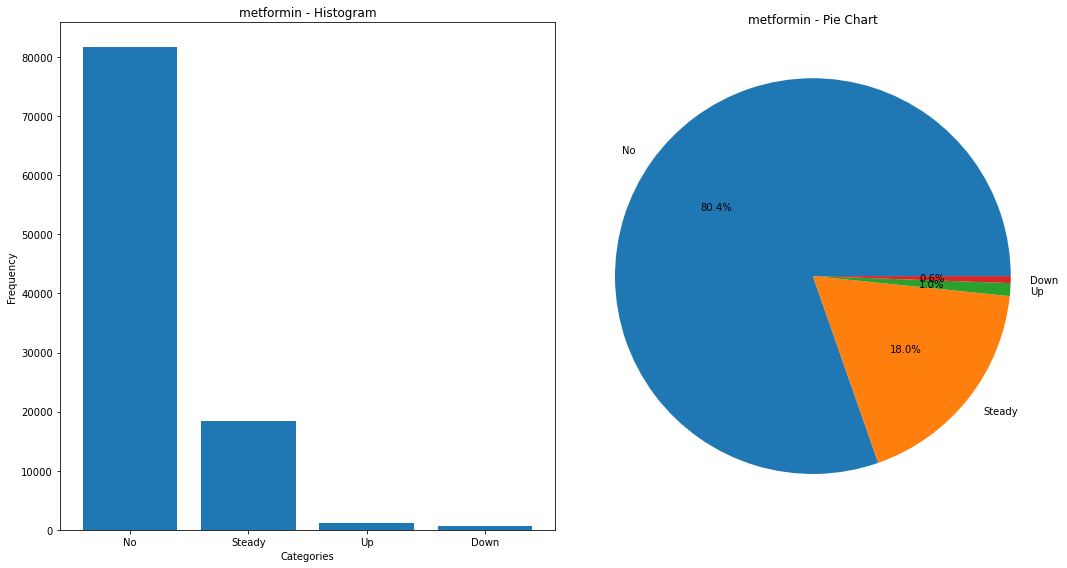

In [25]:
# Display metformin
plot_histogram_pie('metformin')

The "metformin" column in the dataset indicates the medication dosage change for the drug metformin.

The majority of patients, with 81,778 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 18,346 patients.

Additionally, there are 1,067 instances where the dosage is increased ("Up") and 575 instances where the dosage is decreased ("Down").

Monitoring and managing medication dosages, such as metformin, are essential in diabetes management to achieve optimal treatment outcomes.

Value Counts:
No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64


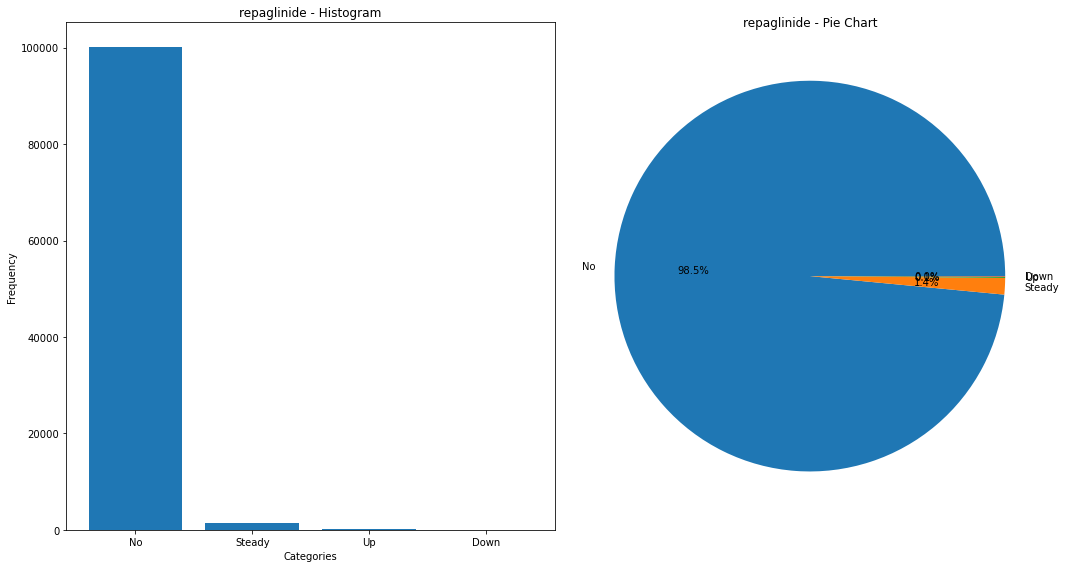

In [26]:
# Display repaglinide
plot_histogram_pie('repaglinide')

The "repaglinide" column in the dataset represents the medication dosage change for the drug repaglinide.

The majority of patients, with 100,227 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 1,384 patients.

Additionally, there are 110 instances where the dosage is increased ("Up") and 45 instances where the dosage is decreased ("Down").

Monitoring and managing medication dosages, such as repaglinide, are important in diabetes management to ensure effective control of blood sugar levels.

Value Counts:
No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64


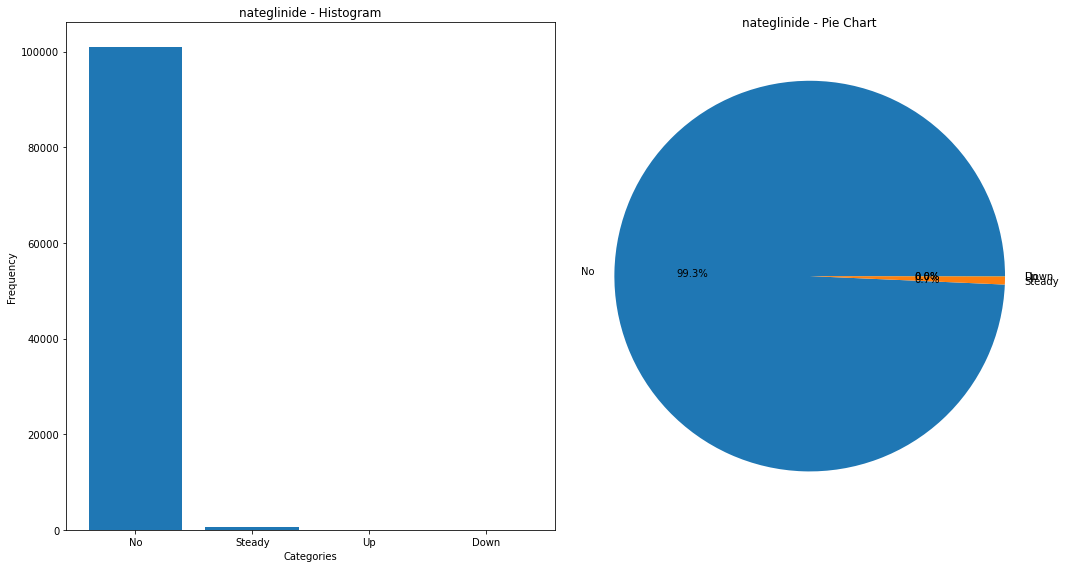

In [27]:
# Display nateglinide
plot_histogram_pie('nateglinide')

The "nateglinide" column in the dataset represents the medication dosage change for the drug nateglinide.

The majority of patients, with 101,063 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 668 patients.

Additionally, there are 24 instances where the dosage is increased ("Up") and 11 instances where the dosage is decreased ("Down").

Monitoring and managing medication dosages, such as nateglinide, are important in diabetes management to ensure effective control of blood sugar levels.

Value Counts:
No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64


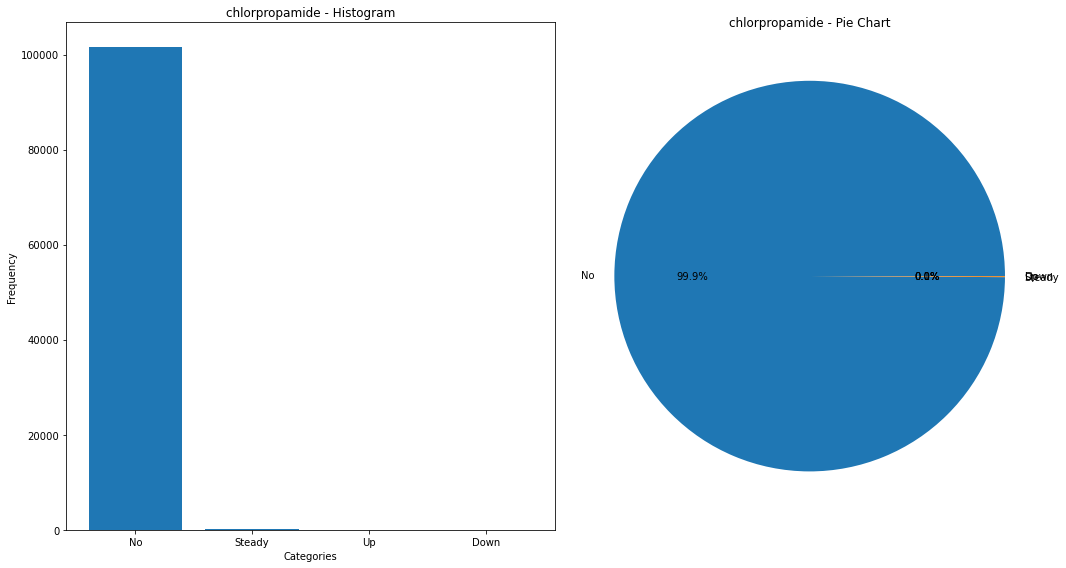

In [28]:
# Display chlorpropamide
plot_histogram_pie('chlorpropamide')

The "chlorpropamide" column in the dataset represents the medication dosage change for the drug chlorpropamide.

The majority of patients, with 101,680 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 79 patients.

Additionally, there are 6 instances where the dosage is increased ("Up") and 1 instance where the dosage is decreased ("Down").

Monitoring and managing medication dosages, such as chlorpropamide, are important in diabetes management to ensure effective control of blood sugar levels.

Value Counts:
No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64


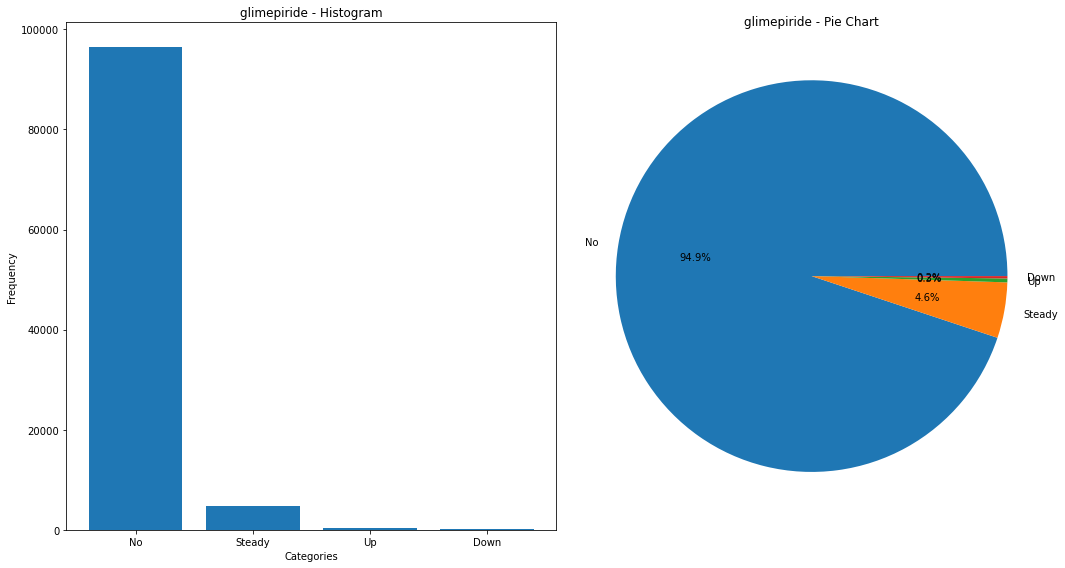

In [29]:
# Display glimepiride
plot_histogram_pie('glimepiride')

The "glimepiride" column in the dataset represents the medication dosage change for the drug glimepiride.

The majority of patients, with 96,575 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 4,670 patients.

Additionally, there are 327 instances where the dosage is increased ("Up") and 194 instances where the dosage is decreased ("Down").

Value Counts:
No        101765
Steady         1
Name: acetohexamide, dtype: int64


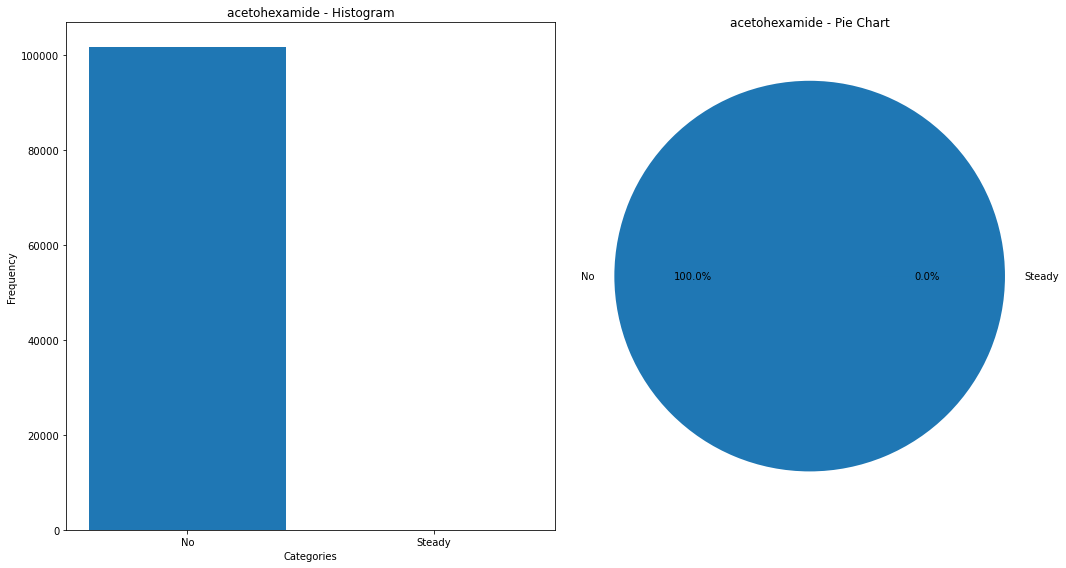

In [30]:
# Display acetohexamide
plot_histogram_pie('acetohexamide')

The "acetohexamide" column in the dataset represents the medication dosage change for the drug acetohexamide.

The majority of patients, with 101,765 instances, have no change in the dosage ("No"). There is only 1 instance where the dosage is kept steady ("Steady").

Value Counts:
No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64


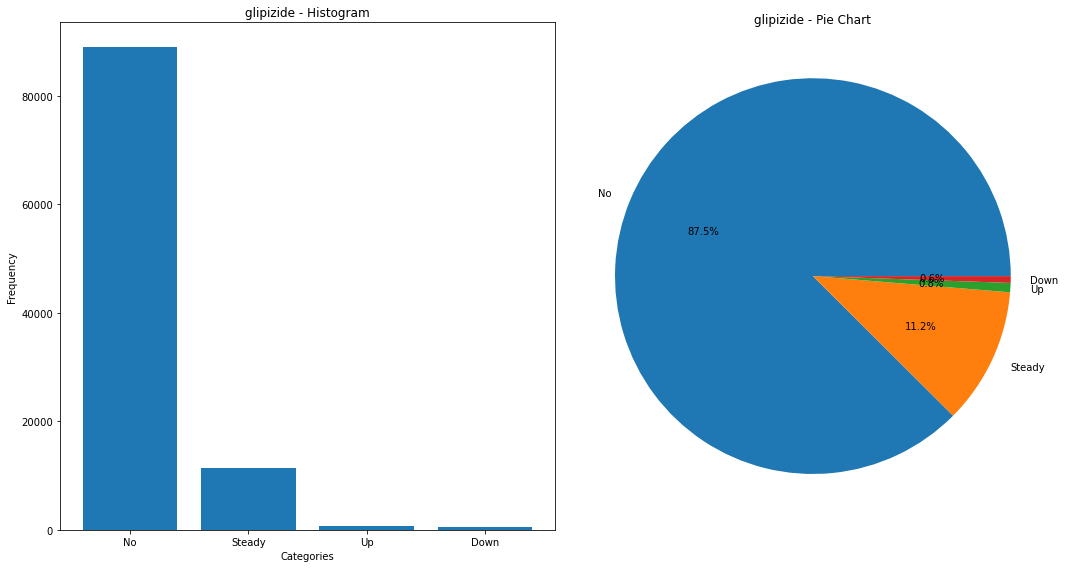

In [31]:
# Display glipizide
plot_histogram_pie('glipizide')

The "glipizide" column in the dataset represents the medication dosage change for the drug glipizide.

The majority of patients, with 89,080 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 11,356 patients. Additionally, there are 770 instances where the dosage is increased ("Up") and 560 instances where the dosage is decreased ("Down").

Value Counts:
No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64


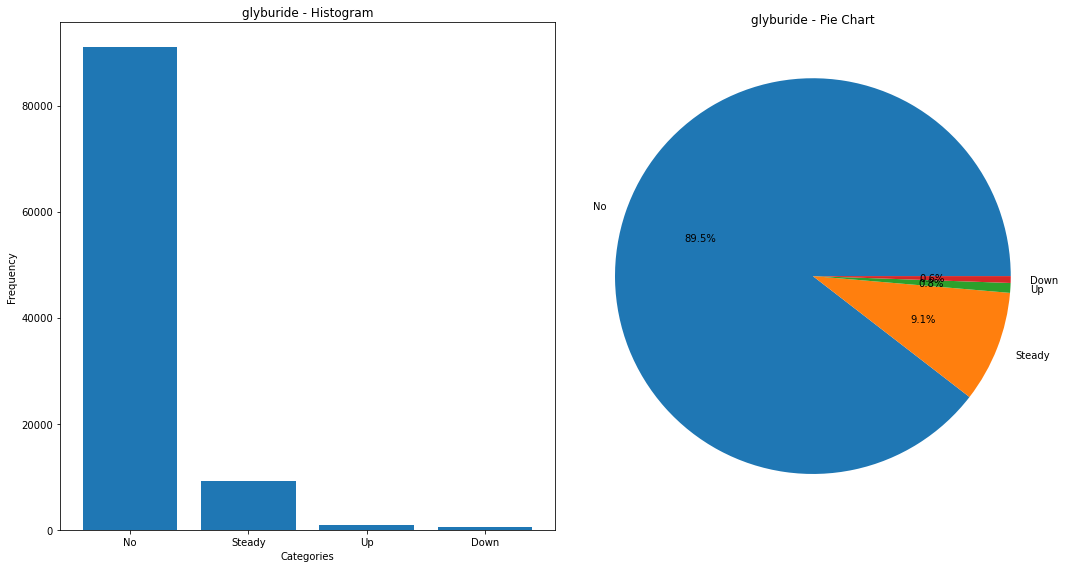

In [32]:
# Display glyburide
plot_histogram_pie('glyburide')

The "glyburide" column in the dataset represents the medication dosage change for the drug glyburide.

The majority of patients, with 91,116 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 9,274 patients. Additionally, there are 812 instances where the dosage is increased ("Up") and 564 instances where the dosage is decreased ("Down").

Value Counts:
No        101743
Steady        23
Name: tolbutamide, dtype: int64


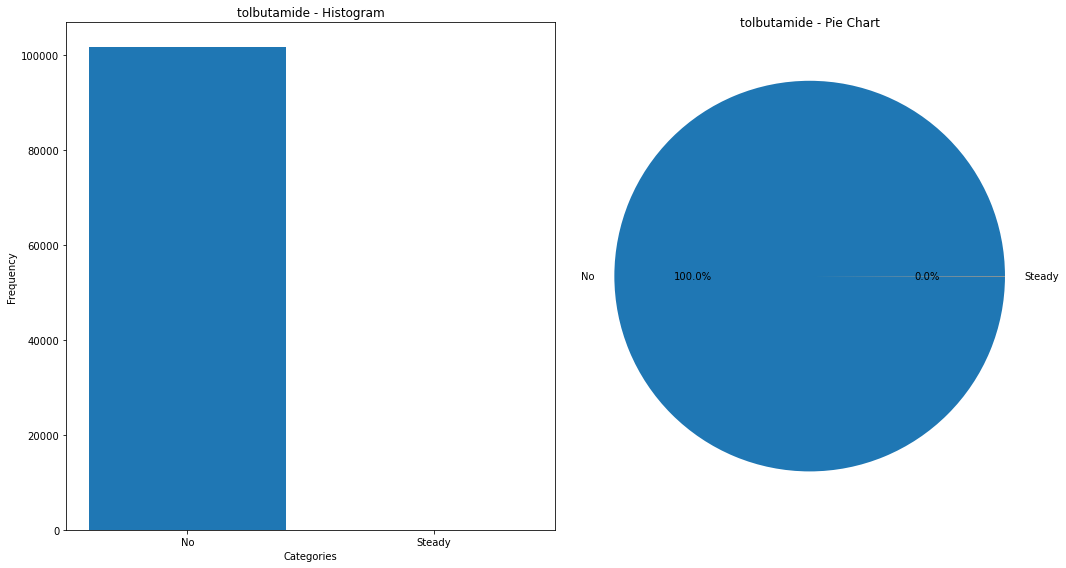

In [33]:
# Display tolbutamide
plot_histogram_pie('tolbutamide')

The "tolbutamide" column in the dataset represents the medication dosage change for the drug tolbutamide.

The majority of patients, with 101,743 instances, have no change in the dosage ("No"). There are only 23 instances where the dosage is kept steady

Value Counts:
No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64


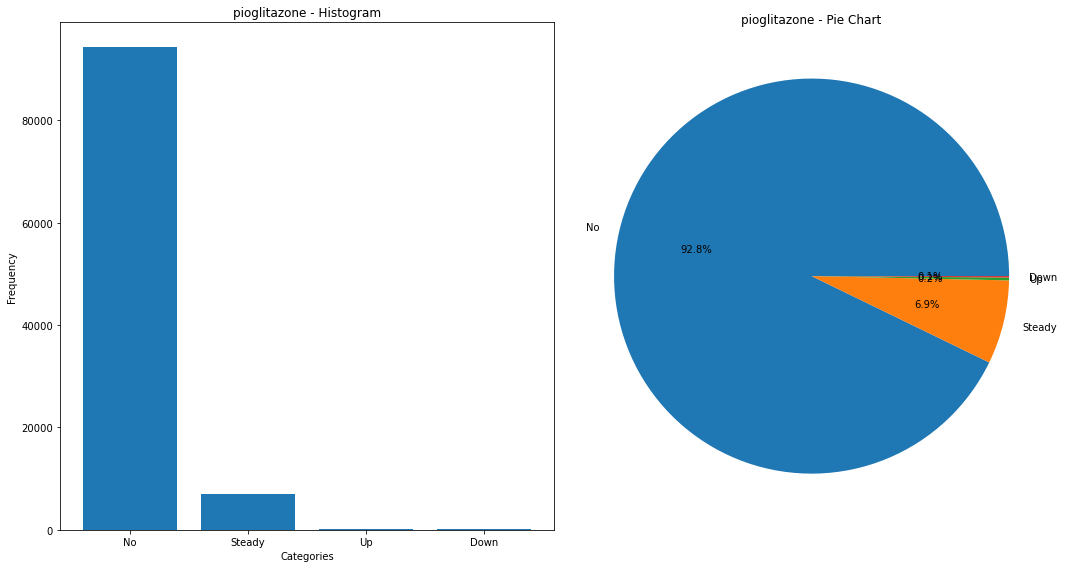

In [34]:
# Display pioglitazone
plot_histogram_pie('pioglitazone')

The "pioglitazone" column in the dataset represents the medication dosage change for the drug pioglitazone.

The majority of patients, with 94,438 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 6,976 patients. Additionally, there are 234 instances where the dosage is increased ("Up") and 118 instances where the dosage is decreased ("Down").

Value Counts:
No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64


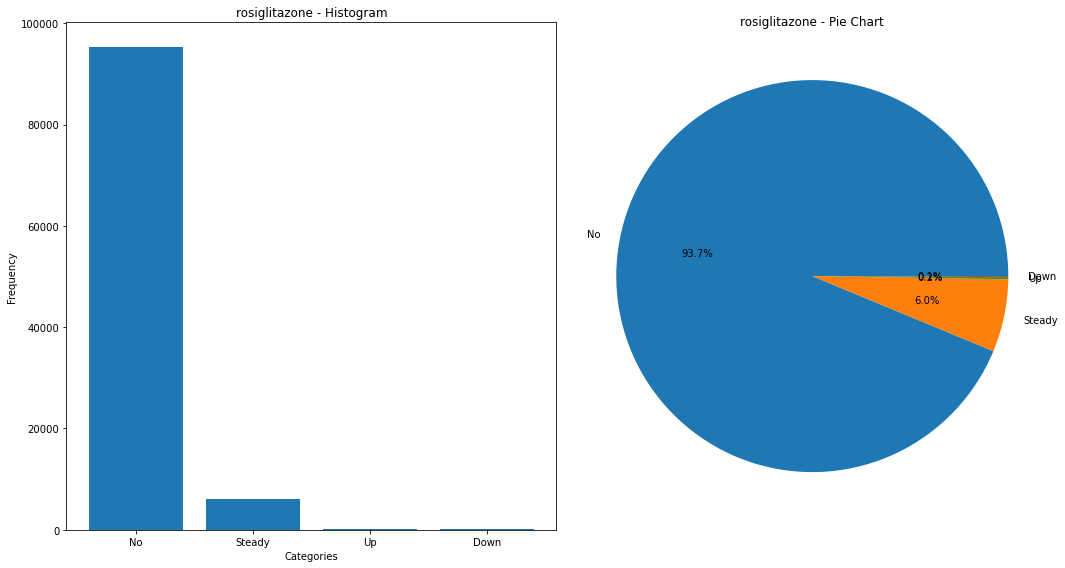

In [35]:
# Display resiglitazone
plot_histogram_pie('rosiglitazone')

The "rosiglitazone" column in the dataset represents the medication dosage change for the drug rosiglitazone.

The majority of patients, with 95,401 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 6,100 patients. Additionally, there are 178 instances where the dosage is increased ("Up") and 87 instances where the dosage is decreased ("Down").

Value Counts:
No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64


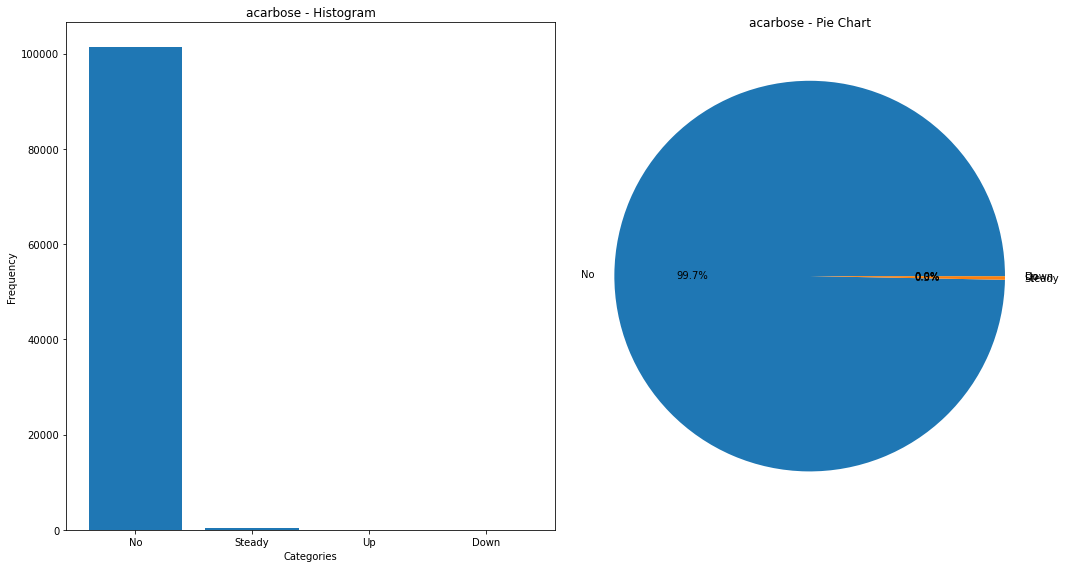

In [36]:
# Display acarbose
plot_histogram_pie('acarbose')

The "acarbose" column in the dataset represents the medication dosage change for the drug acarbose.

The majority of patients, with 101,458 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 295 patients. Additionally, there are 10 instances where the dosage is increased ("Up") and 3 instances where the dosage is decreased ("Down").

Value Counts:
No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64


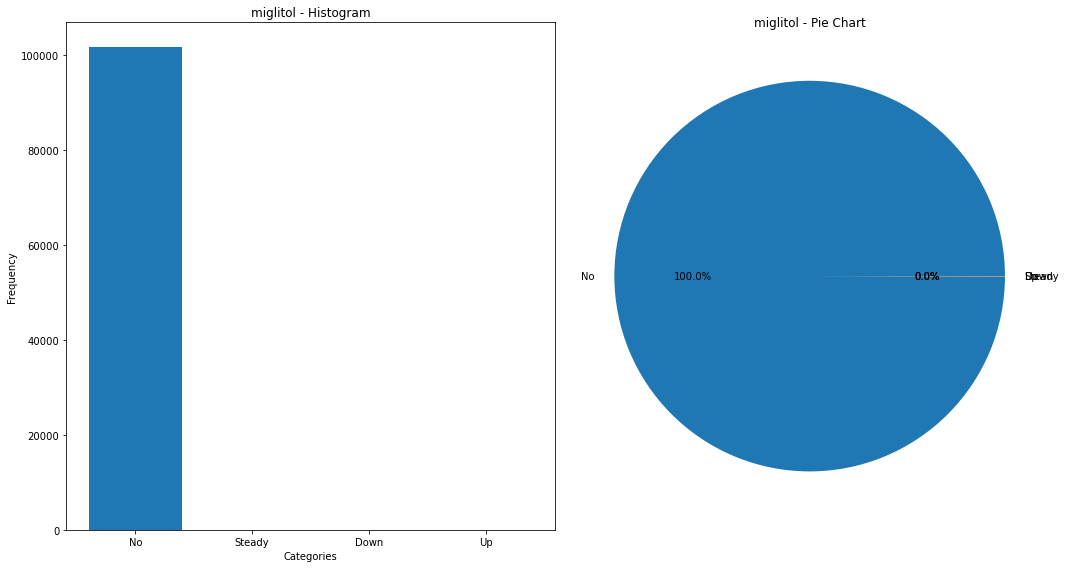

In [37]:
# Display miglitol
plot_histogram_pie('miglitol')

The "miglitol" column in the dataset represents the medication dosage change for the drug miglitol.

The majority of patients, with 101,728 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 31 patients. Additionally, there are 5 instances where the dosage is decreased ("Down") and 2 instances where the dosage is increased ("Up").

Value Counts:
No        101763
Steady         3
Name: troglitazone, dtype: int64


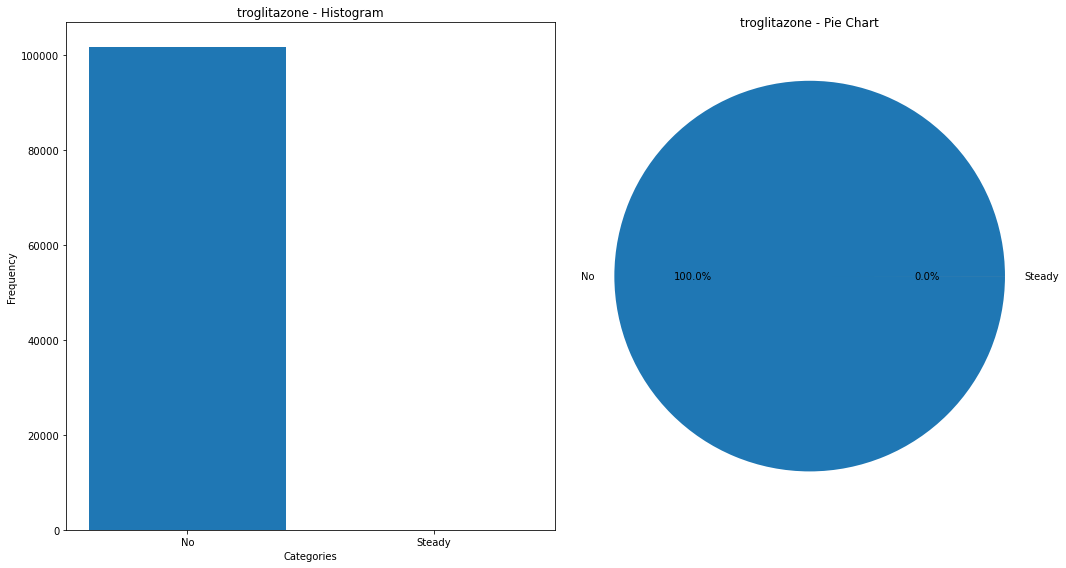

In [38]:
# Display troglitazone
plot_histogram_pie('troglitazone')

The "troglitazone" column in the dataset represents the medication dosage change for the drug troglitazone.

The majority of patients, with 101,763 instances, have no change in the dosage ("No"). There are only 3 instances where the dosage is kept steady.

Troglitazone is a medication used to treat type 2 diabetes, but it has been withdrawn from the market due to safety concerns. Hence, it is expected to have a very low frequency of usage in the dataset.

Value Counts:
No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64


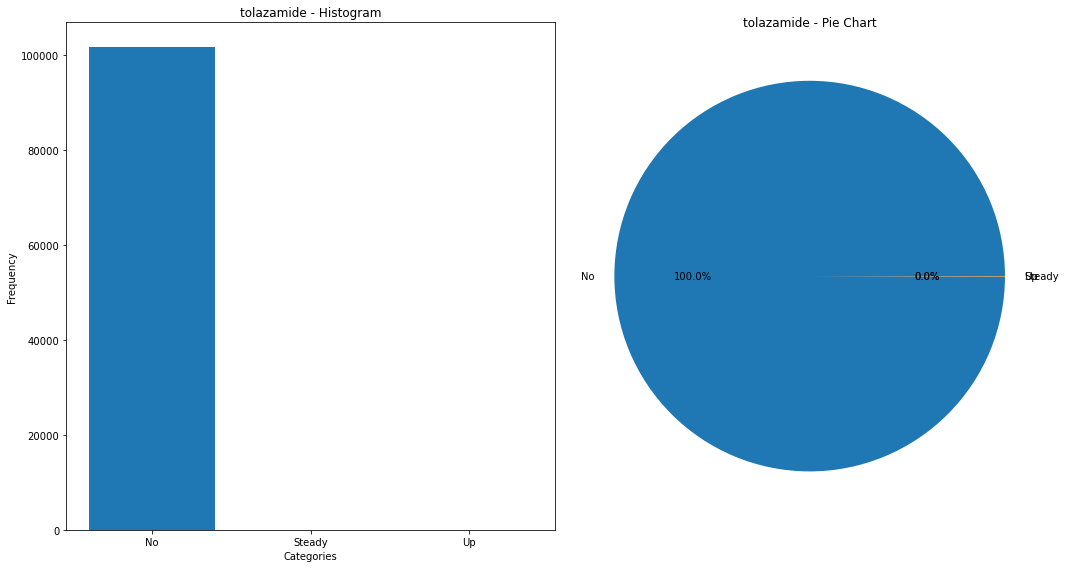

In [39]:
# Display tolazamide
plot_histogram_pie('tolazamide')

The "tolazamide" column in the dataset represents the medication dosage change for the drug tolazamide.

The majority of patients, with 101,727 instances, have no change in the dosage ("No").

There are instances where the dosage is kept steady ("Steady") for 38 patients. Additionally, there is only one instance where the dosage is increased ("Up").

Tolazamide is an oral antidiabetic medication used to control blood sugar levels in patients with type 2 diabetes.

Value Counts:
No    101766
Name: examide, dtype: int64


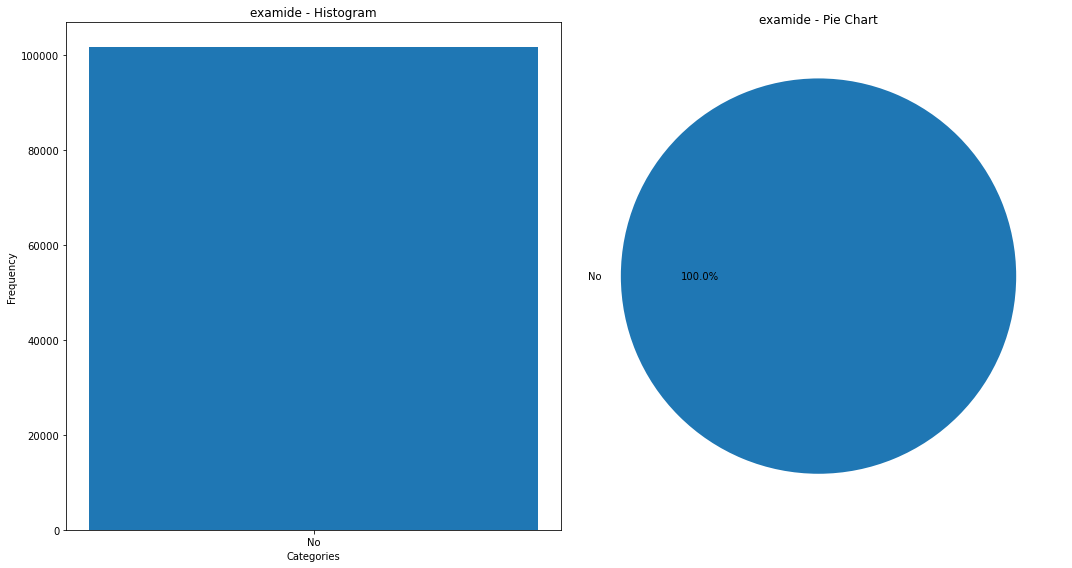

In [40]:
# Display examide
plot_histogram_pie('examide')

In the "examide" column of the dataset, there is only one unique value, which is "No".

This means that all instances in the dataset have the value "No" for the "examide" feature.

Therefore, this feature does not provide any useful information for analysis as it has no variability and does not contribute to distinguishing different instances in the dataset.

Value Counts:
No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64


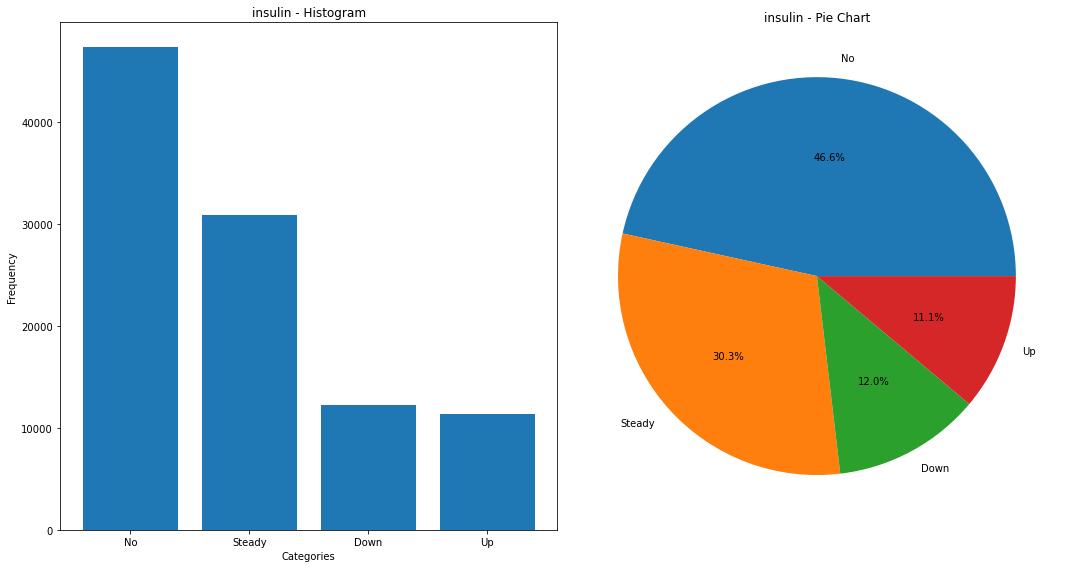

In [41]:
# Display insulin
plot_histogram_pie('insulin')

The "insulin" column in the dataset represents the usage of insulin medication.

Among the instances, 47,383 patients (approximately 46.6%) did not take insulin ("No"), while 30,849 patients (approximately 30.3%) took insulin in a steady dosage ("Steady").

Additionally, there were 12,218 instances (approximately 12%) where the dosage of insulin was decreased ("Down"), and 11,316 instances (approximately 11.1%) where the dosage was increased ("Up").

Insulin is a hormone used to regulate blood sugar levels in patients with diabetes, and the varying dosages reflect the individual needs of the patients in managing their condition.

Value Counts:
No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64


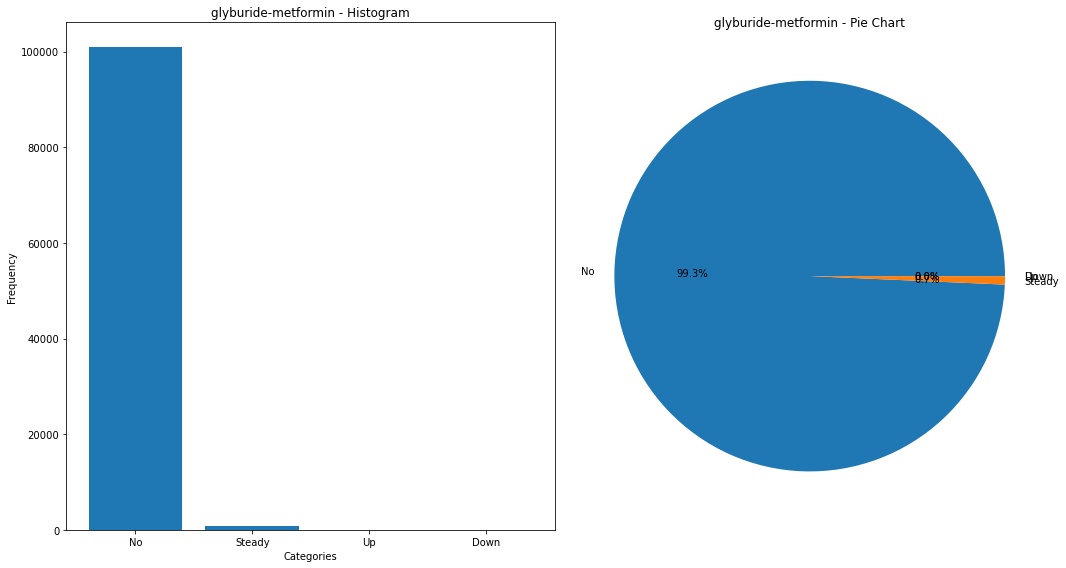

In [42]:
# Display glyburide-metformin
plot_histogram_pie('glyburide-metformin')

The "glyburide-metformin" column in the dataset represents the combination of the medications glyburide and metformin.

Among the instances, 101,060 patients did not take the combination medication ("No"), while 692 patients took the combination medication in a steady dosage ("Steady"). Additionally, there were 8 instances where the dosage of the combination medication was increased ("Up"), and 6 instances where the dosage was decreased ("Down").

Value Counts:
No        101753
Steady        13
Name: glipizide-metformin, dtype: int64


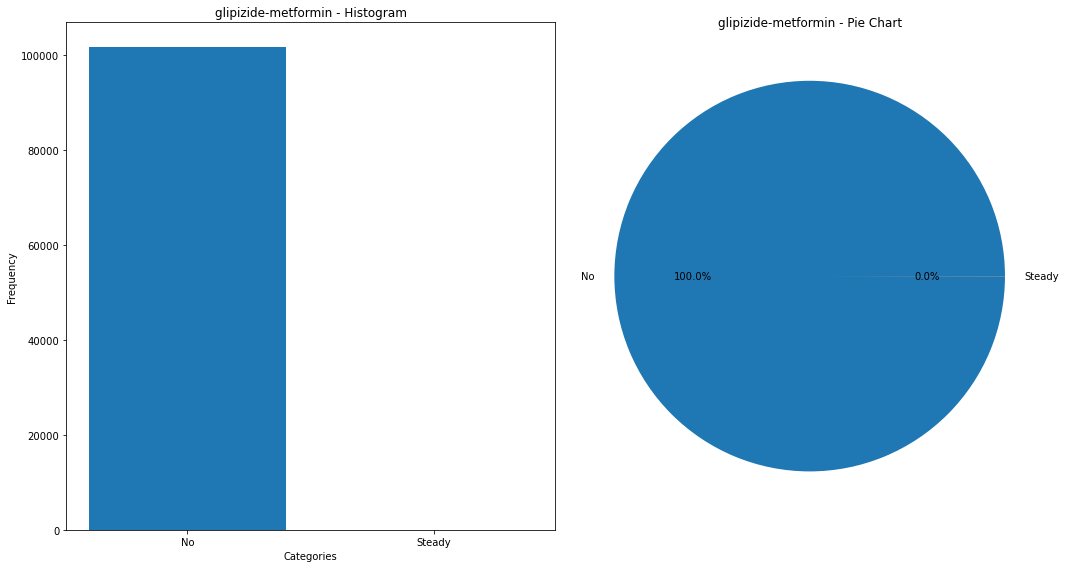

In [43]:
# Display glipizide-metformin
plot_histogram_pie('glipizide-metformin')

The "glipizide-metformin" column in the dataset represents the combination of the medications glipizide and metformin.

Among the instances, 101,753 patients did not take the combination medication ("No"), while 13 patients took the combination medication in a steady dosage ("Steady").

Value Counts:
No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64


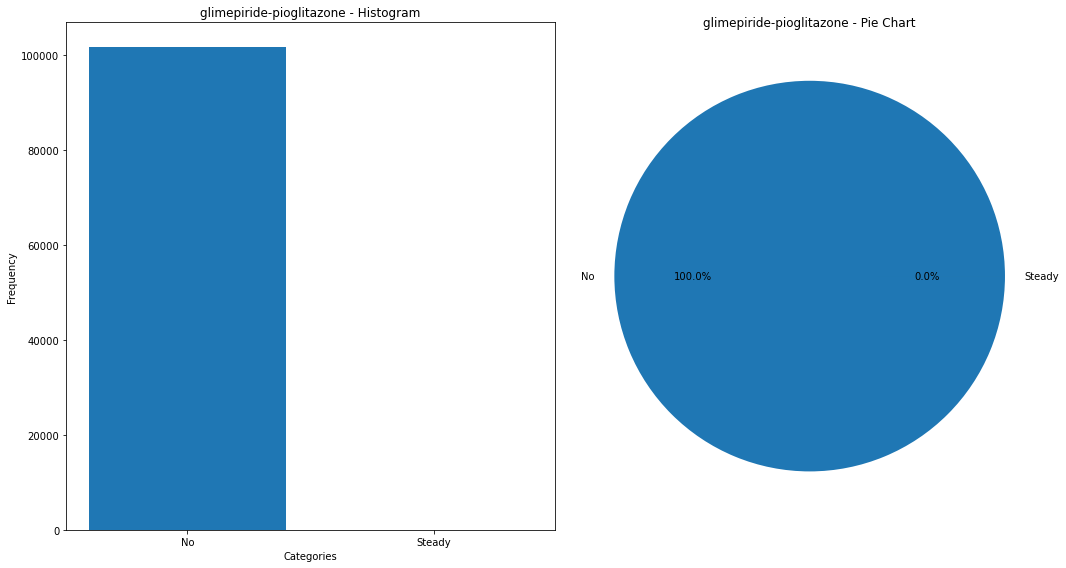

In [44]:
# Display glimepiride-pioglitazone
plot_histogram_pie('glimepiride-pioglitazone')

The "glimepiride-pioglitazone" column in the dataset represents the combination of the medications glimepiride and pioglitazone.

Among the instances, 101,765 patients did not take the combination medication ("No"), while only one patient took the combination medication in a steady dosage ("Steady").

Value Counts:
No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64


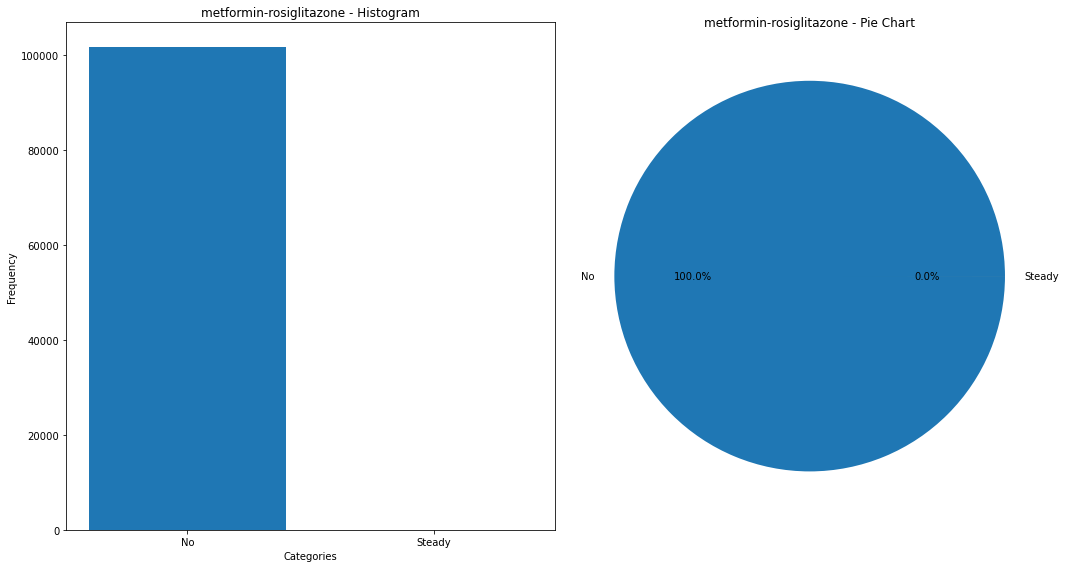

In [45]:
# Display metformin-rosiglitazone
plot_histogram_pie('metformin-rosiglitazone')

The "metformin-rosiglitazone" column in the dataset represents the combination of the medications metformin and rosiglitazone.

Among the instances, 101,764 patients did not take the combination medication ("No"), while two patients took the combination medication in a steady dosage ("Steady").

Value Counts:
No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64


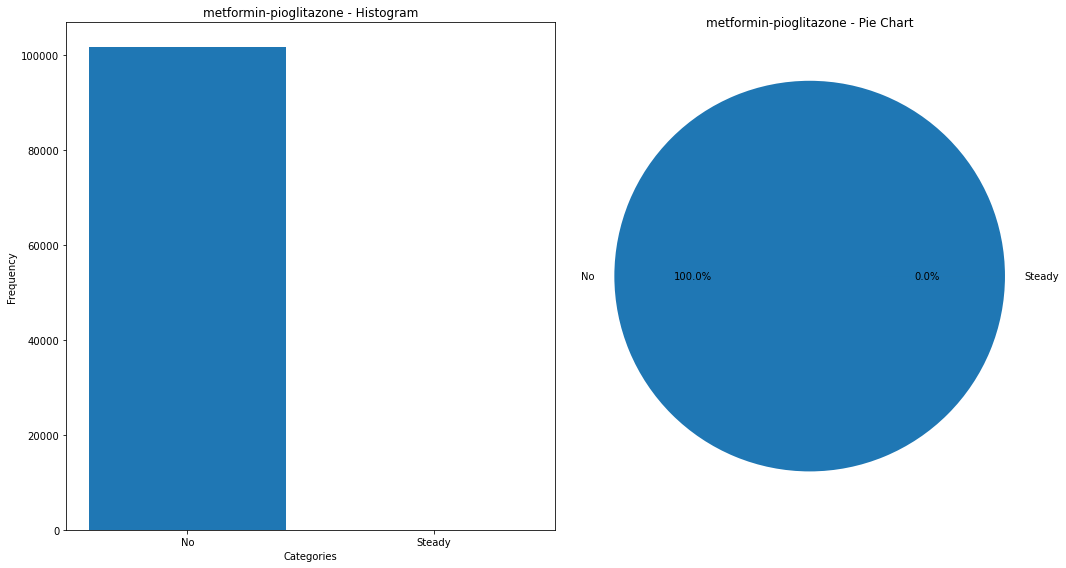

In [46]:
# Display metaformin-pioglitazone
plot_histogram_pie('metformin-pioglitazone')

The "metformin-pioglitazone" column in the dataset represents the combination of the medications metformin and pioglitazone.

Among the instances, 101,765 patients did not take the combination medication ("No"), while only one patient took the combination medication in a steady dosage ("Steady").

Value Counts:
No    54755
Ch    47011
Name: change, dtype: int64


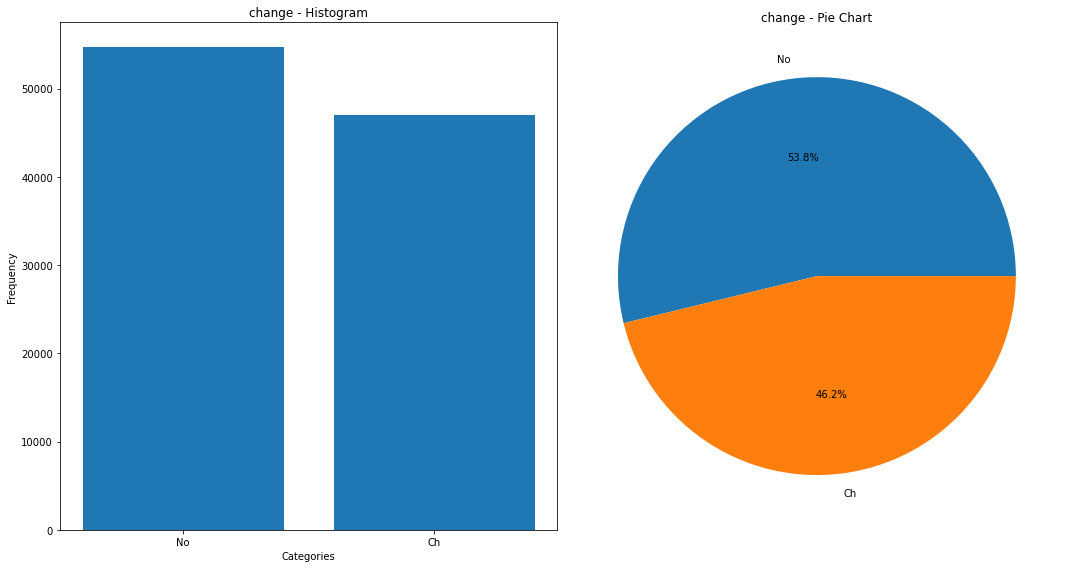

In [47]:
# Display change
plot_histogram_pie('change')

The "change" column in the dataset represents whether there was a change in diabetes medication.

Among the instances, 54,755 patients (approximately 53.6%) did not have a change in medication ("No"), while 47,011 patients (approximately 46.4%) had a change in medication ("Ch").

Value Counts:
Yes    78363
No     23403
Name: diabetesMed, dtype: int64


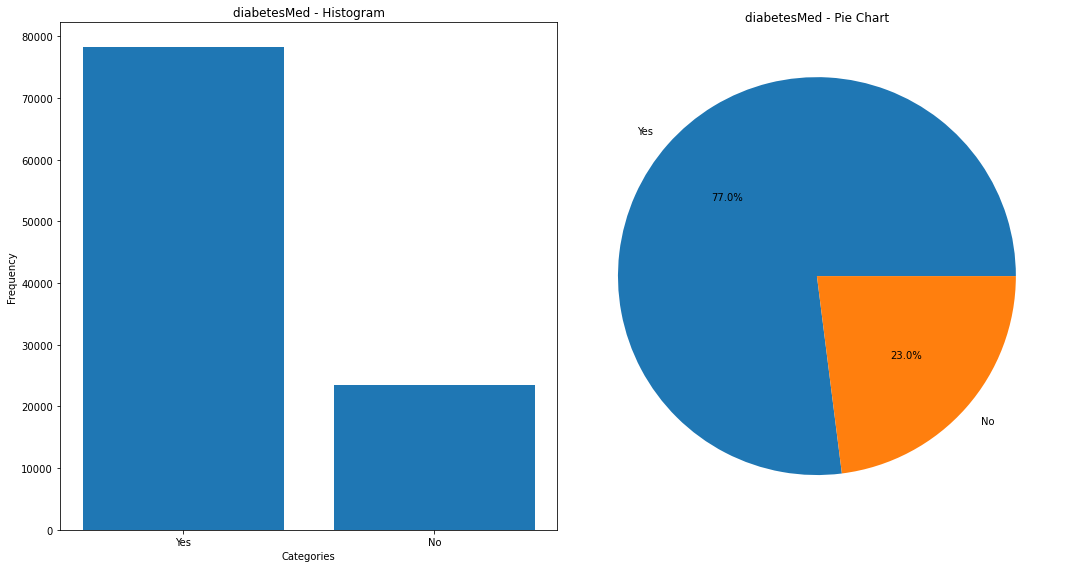

In [48]:
# Display diabetesMed
plot_histogram_pie('diabetesMed')

The "diabetesMed" column in the dataset indicates whether the patient was prescribed diabetes medication.

Among the instances, 78,363 patients (approximately 77%) were prescribed diabetes medication ("Yes"), while 23,403 patients (approximately 23%) were not prescribed diabetes medication ("No").

### 2. **Continuous Variable**

The second type of variable that will be explored is continuous variable.

**Descriptive Statistics**

This section will show descriptive statistics of numerical variables.


In [49]:
# Check the description of the dataset
data.select_dtypes(exclude='object').describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


**Continuous Column Distribution**

This section will show the continuous column distribution using histograms and box plots

In [50]:
# A function to plot the continuous columns histograms and box plots
def plot_histogram_boxplot_kde(data, column):

    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot histogram with KDE
    sns.histplot(data=data, x=column, kde=True, ax=axes[0])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Histogram with KDE of ' + column)

    # Plot box plot
    sns.boxplot(data=data, x=column, ax=axes[1])
    axes[1].set_xlabel(column)
    axes[1].set_ylabel(column)
    axes[1].set_title('Box Plot of ' + column)

    plt.tight_layout()
    plt.show()


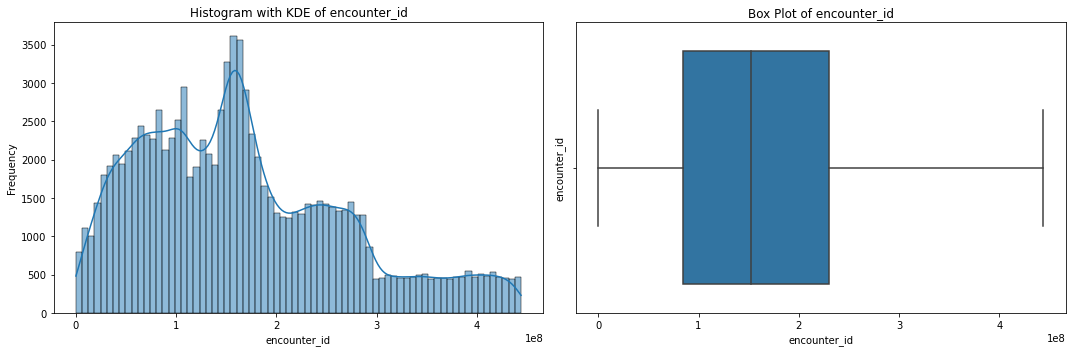

In [51]:
#Plotting the distribution of column 'encounter_id'
plot_histogram_boxplot_kde(data, 'encounter_id')

the column 'encounter_id' is normal (no outliers detected in these columns)

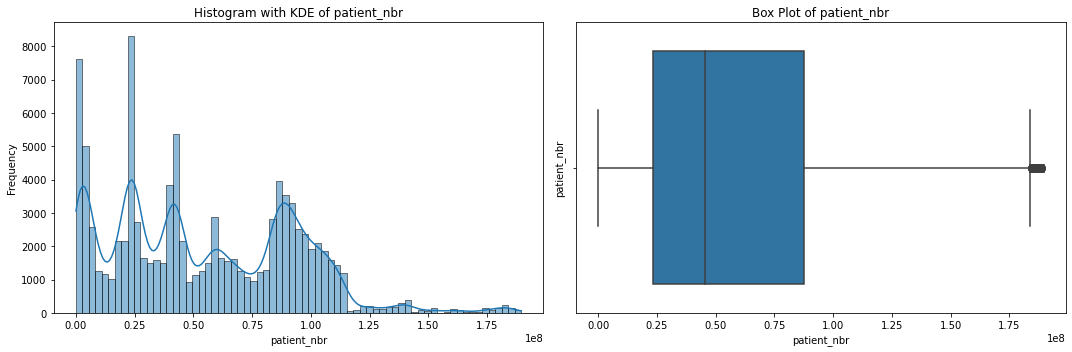

In [52]:
#Plotting the distribution of column 'patient_nbr'
plot_histogram_boxplot_kde(data, 'patient_nbr')

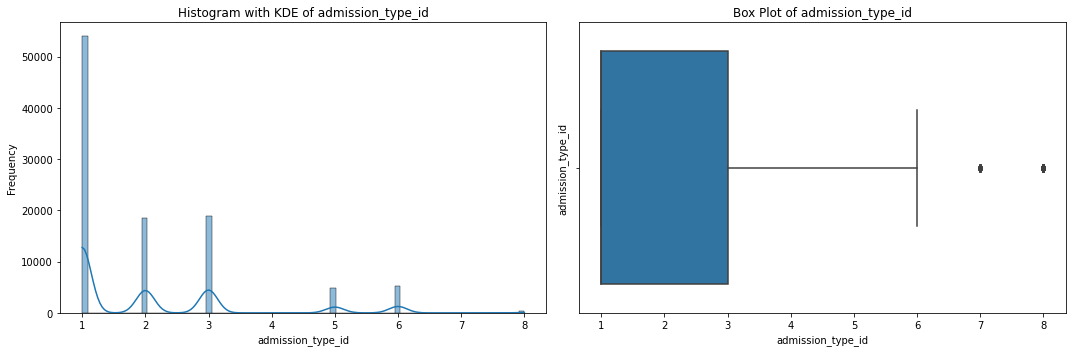

In [53]:
#Plotting the distribution of column 'admission_type_id'
plot_histogram_boxplot_kde(data, 'admission_type_id')

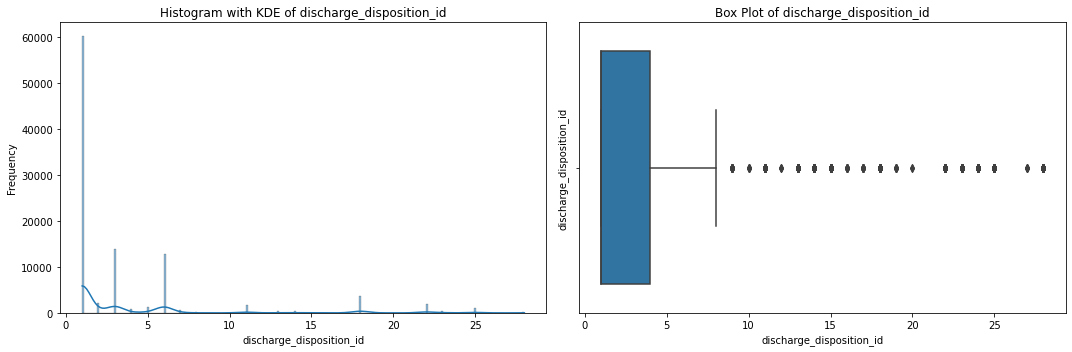

In [54]:
#Plotting the distribution of column 'discharge_disposition_id'
plot_histogram_boxplot_kde(data,'discharge_disposition_id')

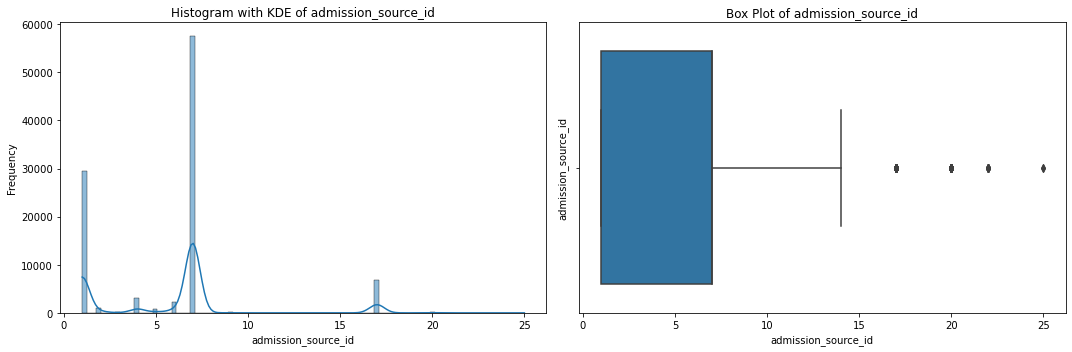

In [55]:
#Plotting the distribution of column 'admission_source_id'
plot_histogram_boxplot_kde(data,'admission_source_id')

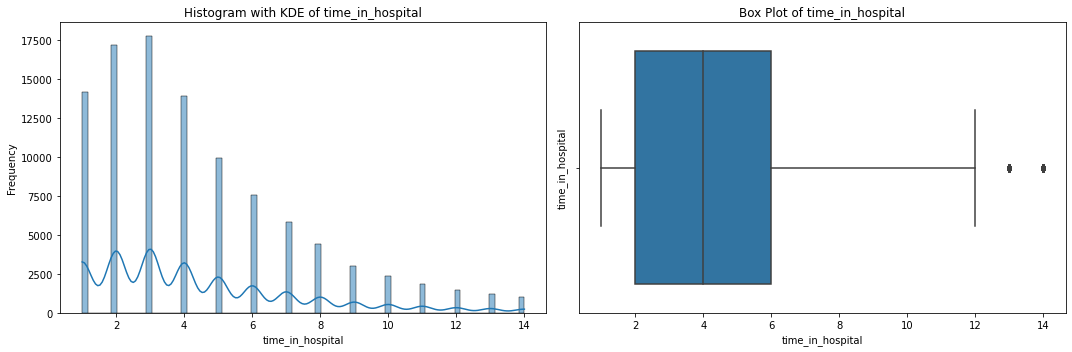

In [56]:
#Plotting the distribution of column 'time_in_hospital'
plot_histogram_boxplot_kde(data,'time_in_hospital')

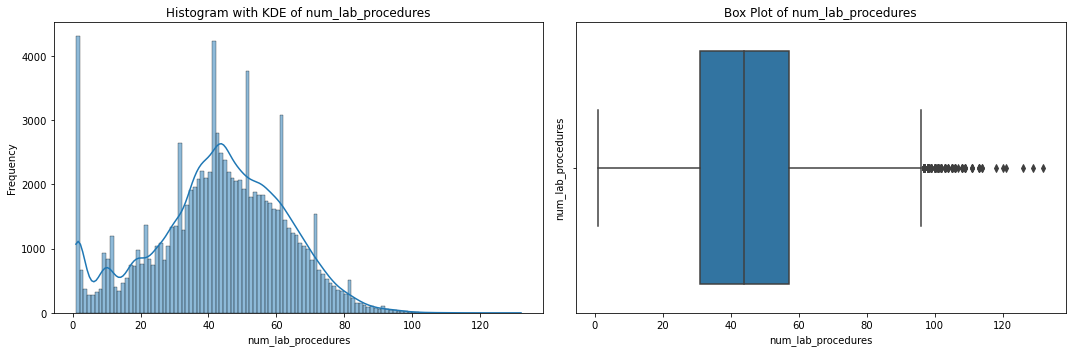

In [57]:
#Plotting the distribution of column 'num_lab_procedures'
plot_histogram_boxplot_kde(data,'num_lab_procedures')

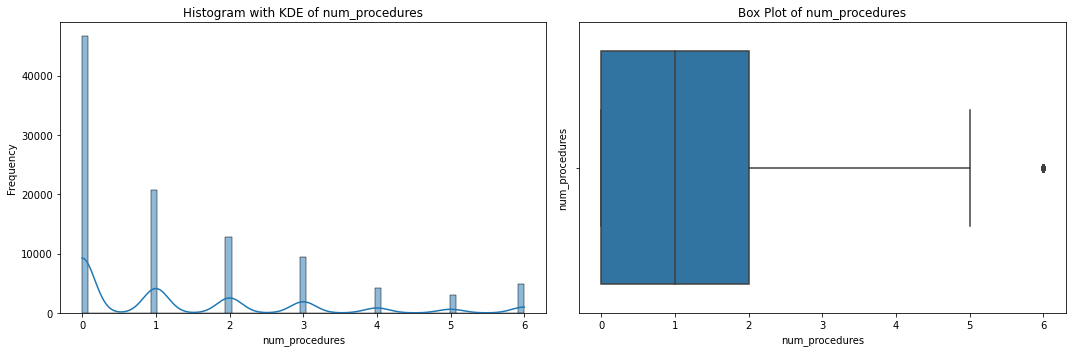

In [58]:
#Plotting the distribution of column 'num_procedures'
plot_histogram_boxplot_kde(data,'num_procedures')

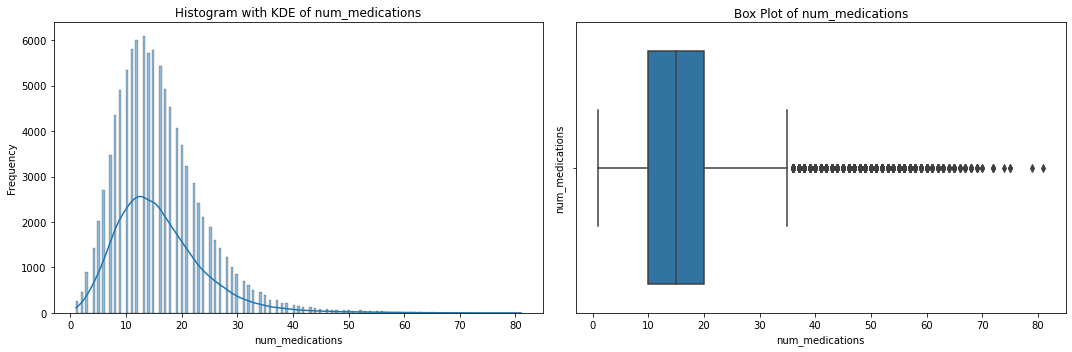

In [59]:
#Plotting the distribution of column 'num_medications'
plot_histogram_boxplot_kde(data,'num_medications')

For 'num_medications', the distribution is right-skewed distributions (has a long right tail, the mean position is on the right side of the data).

This indicates that the majority of patients are prescribed a relatively low number of medications, while a smaller percentage of patients are prescribed a higher number of medications.

This skewed distribution suggests that there may be a significant proportion of patients with complex medical conditions requiring multiple medications, which could have implications for treatment strategies and healthcare resource allocation.

These outliers will be pre-processed in the next section.

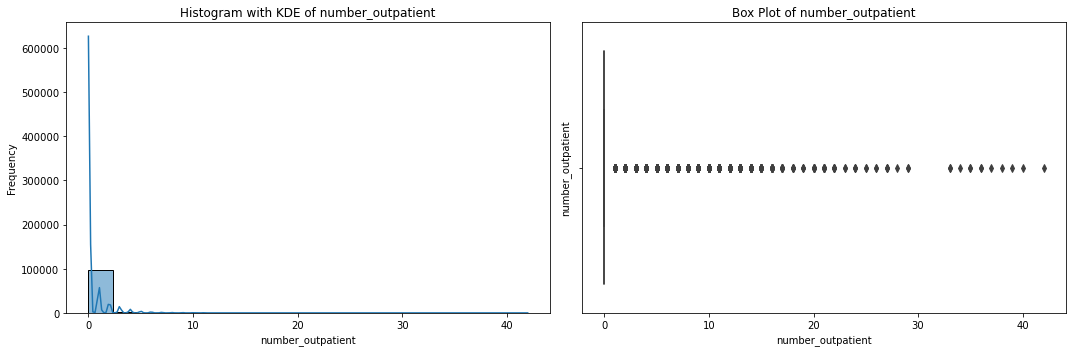

In [60]:
#Plotting the distribution of column 'number_outpatient'
plot_histogram_boxplot_kde(data,'number_outpatient')

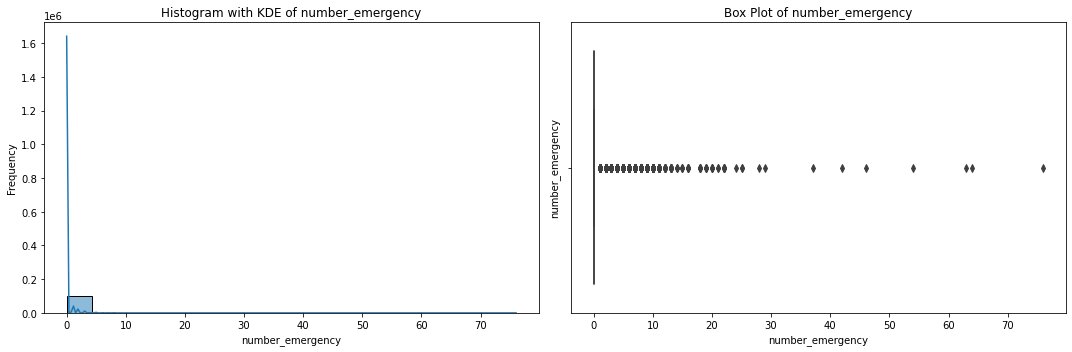

In [61]:
#Plotting the distribution of column 'number_emergency'
plot_histogram_boxplot_kde(data,'number_emergency')

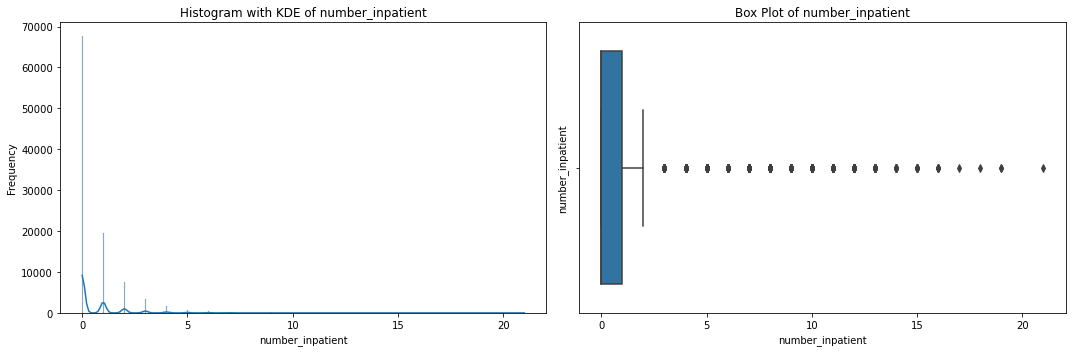

In [62]:
#Plotting the distribution of column 'number_inpatient'
plot_histogram_boxplot_kde(data,'number_inpatient')

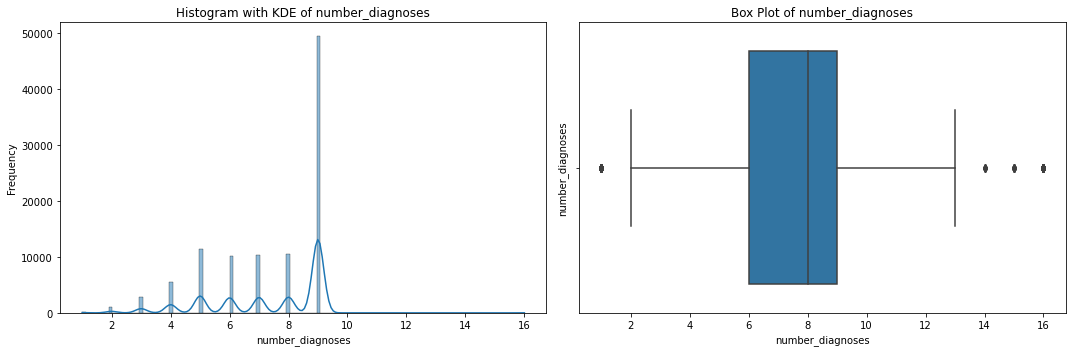

In [63]:
#Plotting the distribution of column 'number_diagnoses'
plot_histogram_boxplot_kde(data,'number_diagnoses')

## <span style='color:orange'>**3. Dealing with missing values**</SPAN>

In [64]:
#Printing Missing Values
print_missing_values(data)

Column               Missing Values  Percentage     
race                 2273            2.23           
weight               98569           96.86          
payer_code           40256           39.56          
medical_specialty    49949           49.08          
diag_1               21              0.02           
diag_2               358             0.35           
diag_3               1423            1.40           


From the analysis above the `weight` column has the highest number of missing values of 96.86%, `medical specialty` has 49.08% and `payer_code` has 39.56%, values missing.

In [65]:
# A function to drop columns of missing values
def drop_column(df, column_name):
    df = df.drop(column_name, axis=1, inplace = True)
    return df

In [66]:
# Dropping columns with missing values
drop_column(data, ['weight', 'payer_code', 'medical_specialty'])


We decided to remove the `weight`, `medical_specialty` and `payer_code` columns from the analysis because they had too many missing values, meaning that the data for these columns were incomplete and not available for a large portion of the dataset.


In [67]:
# Check for the missing values
print_missing_values(data)

Column               Missing Values  Percentage     
race                 2273            2.23           
diag_1               21              0.02           
diag_2               358             0.35           
diag_3               1423            1.40           


We still have some missing data in some rows like `race`, `diag 1-3`. They have small percatage of missing values, so we will drop the rows.

In [68]:
# Dropping rows with missing values
data.dropna(inplace=True)

In [69]:
# Check for the missing values
print_missing_values(data)

Column               Missing Values  Percentage     


No missing values in our dataset.

In [70]:
data.shape

(98053, 47)

## **4. Exploratory Data Analysis**

In [71]:
# Function to plot a histogram in every column of a dataframe

def plot_histogram(df):
    num_df = df.select_dtypes(include='int64')
    num_df.hist(figsize=(16,12))
    return

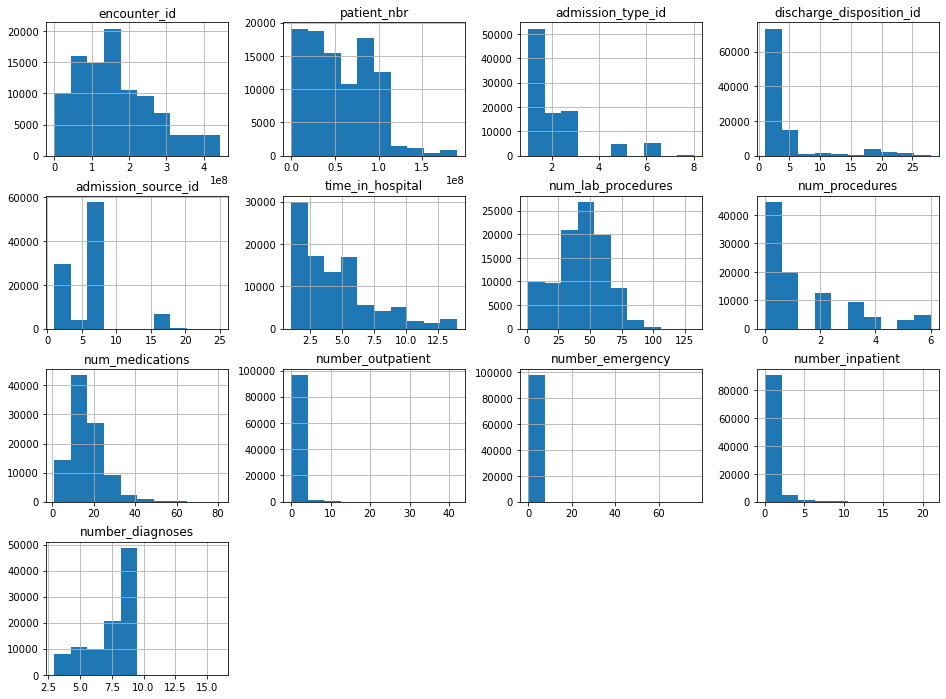

In [72]:
plot_histogram(data)

In the next few cells we are going to explore a few columns to see how they look like  and what exactly they represent. 

### **1. Age**

The age column is groupe in bins of 10s and in categorical objects. We will convert them into numerical values by taking the midian of each bin. 

In [73]:

# taking the median age in each group in the column
data['age'] = data['age'].map({'[70-80)': 75,
                                       '[60-70)': 65,
                                       '[80-90)': 85,
                                       '[50-60)': 55,
                                       '[40-50)':45,
                                       '[30-40)': 35,
                                       '[90-100)':95,
                                       '[20-30)':25,
                                       '[10-20)':15,
                                       '[0-10)': 5})
data['age'].value_counts()

75    25306
65    21809
85    16702
55    16697
45     9265
35     3548
95     2717
25     1478
15      466
5        65
Name: age, dtype: int64

Here we replaced the age column with the middle value of the bins to change then to numerical

### **2. Admission_type_id**

This is a column with 8 distinct features related with the type of admission done for the partient. They include entries like `Emergency`, `Urgent` `Elective` and so on

In [74]:
# print the unique values in the admission_type_id columns
print(data.admission_type_id.nunique())
print(data.admission_type_id.value_counts())


8
1    52178
3    18194
2    17543
6     5135
5     4661
8      312
7       20
4       10
Name: admission_type_id, dtype: int64


Using the domain knowledge there are 8 unique values ranging from 1 to 8. These 8 values represent: 

1 = Emergency, 2 = Urgent, 3 = Elective, 4 = Newborn, 5 = Not Available, 6 = NULL, 7 = Trauma Center, 8 = Not Mapped

In this analysis we decided to merger these categories into less number of categories.

For Example: 

Emeregncy/Urgent/Trauma Center --> Emergency 

Not Available/Null/Not Mapped --> Not Available

Elective --> Elective

New Born --> New Born

In [75]:
# merging the admission_type_id
data['admission_type_id'] = data['admission_type_id'].replace({1:'Emergency',2:'Emergency',7:'Emergency',
                                 5:'Not Available', 6:'Not Available', 8:'Not Available',
                                 3:'Elective',4:'Newborn'})

# Print the value counts
data['admission_type_id'].value_counts()

Emergency        69741
Elective         18194
Not Available    10108
Newborn             10
Name: admission_type_id, dtype: int64

From analysis above, it can be seen that the majority patients that have been admitted in this hospital have an admission type as emergency, followed by elective and not avaliable then newborn.

In [76]:
# Printing the rows and columns in the for admission_type_id == Newborn 
data[data['admission_type_id']== 'Newborn'][['gender','age','admission_type_id']]

,gender,age,admission_type_id
2043,Male,55,Newborn
2203,Male,85,Newborn
2461,Male,75,Newborn
4823,Female,65,Newborn
35877,Male,65,Newborn
47548,Male,45,Newborn
48711,Female,75,Newborn
80354,Female,5,Newborn
87714,Male,65,Newborn
100721,Male,85,Newborn


From the table above there is contradicting information for the admission_type_id and. We will drop the category new born because the admission_type_id == newborn and the age and gender corresponding to it gives contradictory information.

In [77]:
# Dropping the rows with admission_type_id = 'Newborn'
data = data[data['admission_type_id']!='Newborn']

Value Counts:
Emergency        69741
Elective         18194
Not Available    10108
Name: admission_type_id, dtype: int64


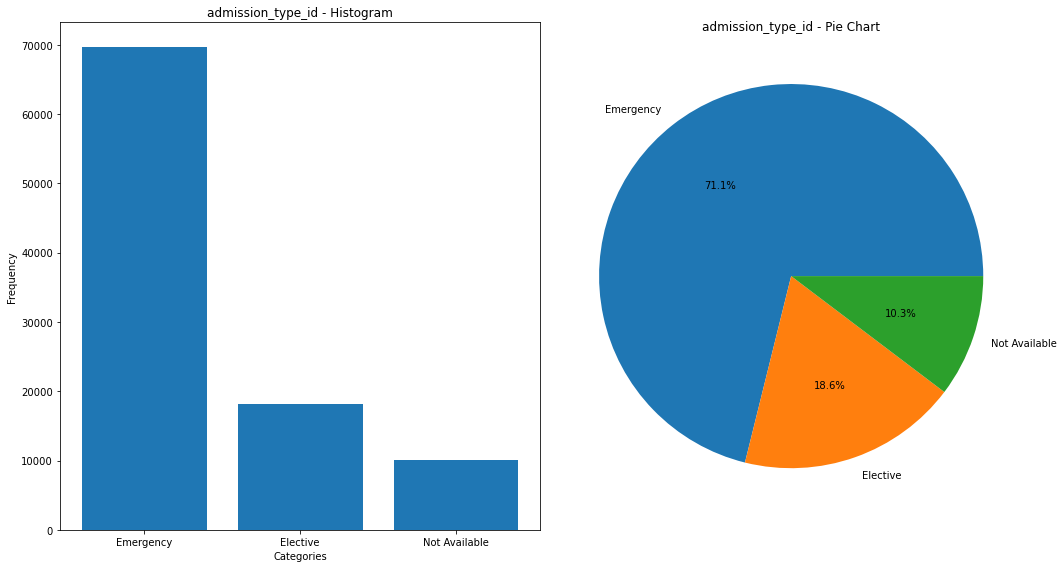

In [78]:
# Plot a istogram and pie chart to see the distribution
plot_histogram_pie('admission_type_id')


### **3. Discharge_disposition_id**

This is an integer identifier corresponding to 26 distinct values like; discharged to home, expired, and not available and so on. We can use the domain knowledge are reduce them to less varaibles that are manageble and not redundant

#### `discharge_disposition_id	description`

1 = Discharged to home

2 = Discharged/transferred to another short term hospital

3 = Discharged/transferred to SNF(skilled nursing facility)

4 = Discharged/transferred to ICF(intermediate care facility)

5 = Discharged/transferred to another type of inpatient care institution

6 = Discharged/transferred to home with home health service

7 = Left AMA(Against Medical Advice.)

8 = Discharged/transferred to home under care of Home IV provider

9 = Admitted as an inpatient to this hospital

10 = Neonate discharged to another hospital for neonatal aftercare

11 = Expired

12 = Still patient or expected to return for outpatient services

13 = Hospice / home

14 = Hospice / medical facility

15 = Discharged/transferred within this institution to Medicare approved swing bed

16 = Discharged/transferred/referred another institution for outpatient services

17 = Discharged/transferred/referred to this institution for outpatient services

18 = NULL

19 = Expired at home. Medicaid only, hospice.

20 = Expired in a medical facility. Medicaid only, hospice.

21 = Expired, place unknown. Medicaid only, hospice.

22 = Discharged/transferred to another rehab fac including rehab units of a hospital .

23 = Discharged/transferred to a long term care hospital.

24 = Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.

25 = Not Mapped

26 = Unknown/Invalid

30 = Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

27 = Discharged/transferred to a federal health care facility.

28 = Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital

29 = Discharged/transferred to a Critical Access Hospital (CAH).

`We can merge some groups here to reduce the number of categories or entris for instance we can have:` 

1 --> Discharged to home

2/3/4/5/10/16/22/23/24/30/27/28/29 ---> Transferred to another medical facility

7 --> Left AMA(Against Medical Advice.)

6/8 --> Discharged to home with home health service

9/12/15/17 --> Still patient/referred to this institution

11/19/20/21 --> Expired

18/25/26 --> Not Available

13/14 --> Hospice

In [79]:
# Convert the 'admission_source_id' column to a reduced categorical variable
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace({1:'Discharged to home',
                                        2:'Transferred to another medical facility',
                                        3:'Transferred to another medical facility',
                                        4:'Transferred to another medical facility',
                                        5:'Transferred to another medical facility',
                                        16:'Transferred to another medical facility',
                                        22:'Transferred to another medical facility',
                                        23:'Transferred to another medical facility',
                                        24:'Transferred to another medical facility',
                                        27:'Transferred to another medical facility',
                                        28:'Transferred to another medical facility',
                                        29:'Transferred to another medical facility',
                                        30:'Transferred to another medical facility',                            
                                        6:'Discharged to home with home health service',
                                        8:'Discharged to home with home health service',
                                        7:'Left AMA',
                                        9:'Still patient/referred to this institution',
                                        12:'Still patient/referred to this institution',
                                        15:'Still patient/referred to this institution',
                                        17:'Still patient/referred to this institution',
                                        10:'Neonate discharged',
                                        11:'Expired',
                                        19:'Expired',
                                        20:'Expired',
                                        21:'Expired',
                                        13:'Hospice',
                                        14:'Hospice',
                                        18:'Not Available',
                                        25:'Not Available',
                                        26:'Not Available'})

# Print the value counts for 'discharge_disposition_id'
print(data['discharge_disposition_id'].value_counts())

Discharged to home                             57604
Transferred to another medical facility        20067
Discharged to home with home health service    12728
Not Available                                   4565
Expired                                         1616
Hospice                                          764
Left AMA                                         592
Still patient/referred to this institution       101
Neonate discharged                                 6
Name: discharge_disposition_id, dtype: int64


From the table above we have some entries with expired, hospice and neonate discharged that need to be dropped because they might causes some bias since they can not be readmitted. 

In [80]:
# Dropping the Expired, Hospice and Neonate discharged
data = data[data['discharge_disposition_id'] !='Expired']
data = data[data['discharge_disposition_id'] !='Hospice']
data = data[data['discharge_disposition_id'] !='Neonate discharged']

Value Counts:
Discharged to home                             57604
Transferred to another medical facility        20067
Discharged to home with home health service    12728
Not Available                                   4565
Left AMA                                         592
Still patient/referred to this institution       101
Name: discharge_disposition_id, dtype: int64


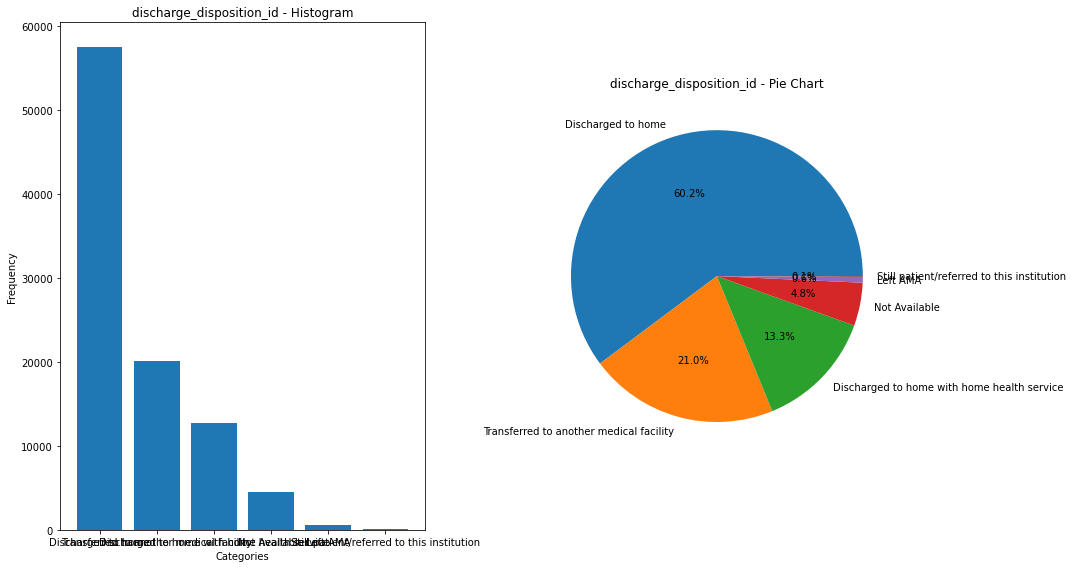

In [81]:
# Plot a histogram and pie chart to visualize the distribution
plot_histogram_pie('discharge_disposition_id')

### **4. Admission_source_id**
These are integer identifiers that correspond to 17 distinct values, for instance, physician referral, emergency room, and transfer from a hospital and more others

In [82]:
# Print the admission_source_id pattern 
data['admission_source_id'].value_counts(sort=False)

1     27959
2      1010
3       177
4      2878
5       798
6      1868
7     54328
8        14
9        49
10        7
11        2
13        1
14        1
17     6393
20      158
22       12
25        2
Name: admission_source_id, dtype: int64

Using the domain knowledge here is the `admission_source_id description`

1 = Physician Referral

2 = Clinic Referral

3 = HMO Referral(Health Maintenance Organization)

4 = Transfer from a hospital

5 = Transfer from a Skilled Nursing Facility (SNF)

6 = Transfer from another health care facility

7 = Emergency Room

8 = Court/Law Enforcement

9 = Not Available

10 = Transfer from critial access hospital

11 = Normal Delivery

12 = Premature Delivery

13 = Sick Baby

14 = Extramural Birth

15 = Not Available

17 = NULL

18 = Transfer From Another Home Health Agency

19 = Readmission to Same Home Health Agency

20 = Not Mapped

21 = Unknown/Invalid

22 = Transfer from hospital inpt/same fac reslt in a sep claim

23 = Born inside this hospital

24 = Born outside this hospital

25 = Transfer from Ambulatory Surgery Center

26 = Transfer from Hospice

`We can merge several groups here to reduce the number of categories and reduce redundancy:`

Referral --> 1/2/3

Transferred from another health care facility --> 4/5/6/10/18/19/25/26/22

Emergency --> 7

Not Available --> 9/15/17/20/21

Court/Law Enforcement --> 8

Delivery --> 11/12/14/13/23/24

In [83]:
# Converting the values to reduce the entries
data['admission_source_id']=data['admission_source_id'].replace({1:'Referral',
                                   2:'Referral',
                                   3:'Referral',
                                   4:'Transferred from another health care facility',
                                   5:'Transferred from another health care facility',
                                   6:'Transferred from another health care facility',
                                   8:'Emergency',                                    
                                   10:'Transferred from another health care facility',
                                   18:'Transferred from another health care facility',
                                   19:'Transferred from another health care facility',
                                   25:'Transferred from another health care facility',
                                   26:'Transferred from another health care facility',
                                   7:'Emergency',
                                   9:'Not Available',
                                   15:'Not Available',
                                   17:'Not Available',
                                   20:'Not Available',
                                   21:'Not Available',
                                   11:'Delivery',
                                   12:'Delivery',
                                   13:'Delivery',
                                   14:'Delivery',
                                   23:'Delivery',
                                   22:"Transferred from another health care facility",                                    
                                   24:'Delivery'})

# print the values of admission_source_id

print(data['admission_source_id'].value_counts())

Emergency                                        54342
Referral                                         29146
Not Available                                     6600
Transferred from another health care facility     5565
Delivery                                             4
Name: admission_source_id, dtype: int64


printing the Delivery values with rispect to gender, and age

In [84]:
# Print the admission_source_id with respect to gender and age
data[data['admission_source_id']=='Delivery'][['gender', 'age', 'admission_source_id']]

,gender,age,admission_source_id
83432,Female,75,Delivery
83510,Female,25,Delivery
85588,Female,75,Delivery
97384,Male,75,Delivery


We will drop the Delivery entries because the admission_source_id == delivery and the age corresponding to it give contradictory information.

In [85]:
# Dropping the Delivery admission_source_id category
data = data[data['admission_source_id']!='Delivery']

Since we have 2 columns regarding `admission, type_id and source_id`, we  will use this information to fill the `Not Available` values in `admssion_source_id` columns with respect to the `admission_type_id`. For example, if `admission_type_id` is Emergency but `admission_source_id` is Not Available, we can fill Emergency(mode) in that place.
After filling it admission_type_id column will be dropped since it will be giving the same information as admission_source_id and will be less significant statistically.

In [86]:
data = data.reset_index(drop=True)

In [87]:
# Before we begin, let's look at the data were are working with.
data[data['admission_type_id'] == 'Emergency']['admission_source_id'].value_counts()

Emergency                                        51650
Referral                                         10895
Transferred from another health care facility     4295
Not Available                                      963
Name: admission_source_id, dtype: int64

In [88]:
# Merging using a for loop
for x in range(data.shape[0]):
    if data.loc[x, 'admission_source_id']=='Not Available' and data.loc[x, 'admission_type_id'] == 'Emergency':
        data.loc[x, 'admission_source_id'] = 'Emergency'

In [89]:
# After merging
data[data['admission_type_id']=='Emergency']['admission_source_id'].value_counts()

Emergency                                        52613
Referral                                         10895
Transferred from another health care facility     4295
Name: admission_source_id, dtype: int64

In [90]:
# Before we do the merging lets the distribution
data[data['admission_type_id']=='Elective']['admission_source_id'].value_counts()

Referral                                         15841
Transferred from another health care facility     1200
Emergency                                          901
Not Available                                       56
Name: admission_source_id, dtype: int64

In [91]:
# Merging using a for loop
for x in range(data.shape[0]):
    if data.loc[x, 'admission_source_id'] == 'Not Available' and data.loc[x, 'admission_type_id'] == 'Elective':
        data.loc[x, 'admission_source_id'] = 'Referral'

In [92]:
# After merging
data[data['admission_type_id']=='Elective']['admission_source_id'].value_counts()

Referral                                         15897
Transferred from another health care facility     1200
Emergency                                          901
Name: admission_source_id, dtype: int64

Value Counts:
3     16725
2     16110
4     13197
1     13116
5      9482
6      7137
7      5536
8      4157
9      2805
10     2207
11     1724
12     1359
13     1127
14      971
Name: time_in_hospital, dtype: int64


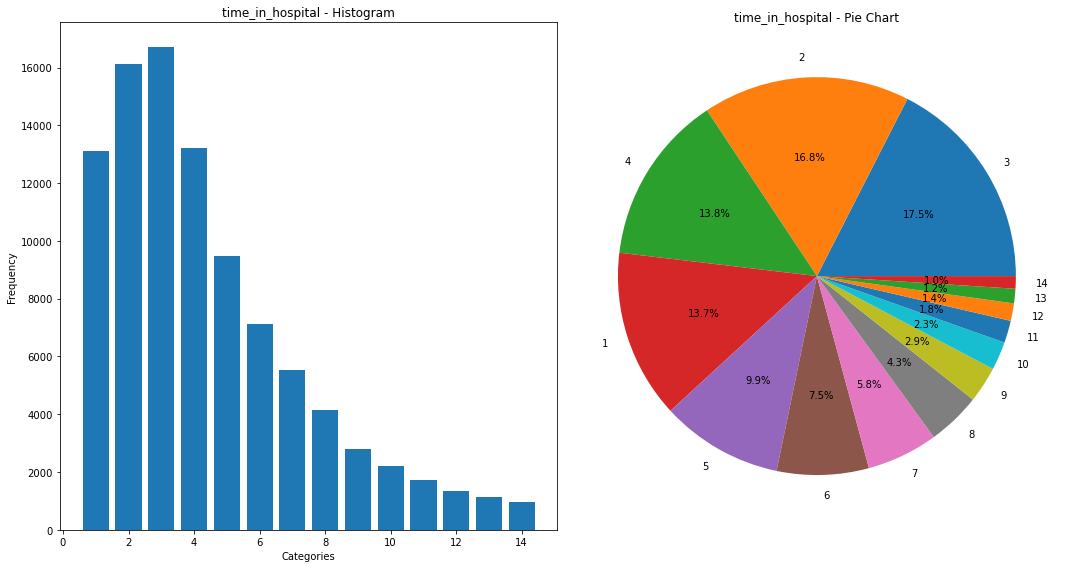

In [93]:
# Displying the frequency time spent in hospital by partient
plot_histogram_pie('time_in_hospital')

In [94]:
data = data.reset_index(drop = True )


### **5. Diagnosis Columns**
3 columns showing diagn_1, diagn_2 and diagn_3. These are various disgnosis procudures done on the patients and are represented as number codes. We will map the codes to their correct diagnistic name. 

In [95]:
# put the diagnisis columns together
diag_cols = ['diag_1','diag_2','diag_3']

In [96]:
# Using domain knowlege to map the number code swith the exact diagnosis
for i in diag_cols:
    for j in range(len(data[i])):
        if str(data.loc[j, i])[:3] == '250':
            data.loc[j, i] = 'Diabetes'
        elif ord(str(data.loc[j, i])[0]) in range(69, 87):
            data.loc[j, i] = 'External causes of injury'
        elif data.loc[j, i] == '?':
            data.loc[j, i] = 'Missing'
        else:
            x = float(data.loc[j, i])
            if x in range(390, 460) or x == 785:
                data.loc[j, i] = 'Circulatory'
            elif x in range(460, 520) or x == 786:
                data.loc[j, i] = 'Respiratory'
            elif x in range(520, 580) or x == 787:
                data.loc[j, i] = 'Digestive'
            elif x in range(800, 1000):
                data.loc[j, i] = 'Injury and Poisoning'
            elif x in range(710, 740):
                data.loc[j, i] = 'Musculoskeletal System and Connective Tissue'
            elif x in range(580, 630) or x == 788:
                data.loc[j, i] = 'Genitourinary'
            elif x in range(140, 230):
                data.loc[j, i] = 'Neoplasms'
            elif x in [780, 781, 784] or x in range(790, 800):
                data.loc[j, i] = 'Other Symptoms'
            elif x in range(240, 280):
                data.loc[j, i] = 'Endocrine, Nutritional, Metabolic, Immunity'
            elif x in range(680, 710) or x == 782:
                data.loc[j, i] = 'Skin and Subcutaneous Tissue'
            elif x in range(1, 140):
                data.loc[j, i] = 'Infectious and Parasitic'
            elif x in range(290, 320):
                data.loc[j, i] = 'Mental Disorders'
            elif x in range(280, 290):
                data.loc[j, i] = 'Blood and Blood-Forming Organs'
            elif x in range(320, 360):
                data.loc[j, i] = 'Nervous'
            elif x in range(630, 680):
                data.loc[j, i] = 'Pregnancy, Childbirth'
            elif x in range(360, 390):
                data.loc[j, i] = 'Sense Organs'
            else:
                data.loc[j, i] = 'Congenital Anomalies'

In [97]:
# Printing the diagnosis with the correct names in a dataframe
data1 = pd.DataFrame(data['diag_1'].value_counts())
data2 = data1.merge(pd.DataFrame(data['diag_2'].value_counts()), how = 'outer', left_index = True, right_index = True)
data2.merge(pd.DataFrame(data['diag_3'].value_counts()), how = 'outer', left_index = True, right_index = True)

,diag_1,diag_2,diag_3
Blood and Blood-Forming Organs,1068,2795,2399
Circulatory,28881,30391,28931
Congenital Anomalies,781,472,467
Diabetes,7869,11774,16516
Digestive,9044,3967,3780
"Endocrine, Nutritional, Metabolic, Immunity",2534,7752,8717
External causes of injury,1588,2428,4934
Genitourinary,4870,7976,6285
Infectious and Parasitic,2477,1796,1772
Injury and Poisoning,6587,2285,1843


### **6. Medication**
This is the columns with generic names of medicines for diabetic partients. The feature indicates whether the drug was prescribed or there was a change in the dosage. For instance: 

>>up --> if the dosage was increased during the encounter

>>down --> if the dosage was decreased
        
>> steady --> if the dosage did not change
        
>>no --> if the drug was not prescribed

In [98]:
# Put All medicines together in one variable
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for x in meds:
       print(x, data[x].unique())

metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
examide ['No']
citoglipton ['No']
insulin ['Up' 'No' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No']
metformin-pioglitazone ['No' 'Steady']


We will drop the columns `examide`, `citoglipton` and `metformin-rosiglitazone` because they were not prescribed to a patient and therefore will not be used in the analysis.  

In [99]:
# We can drop examide, citoglipton and metformin-rosiglitazone as it is not prescribed to any patient.
data.drop(['examide', 'citoglipton','metformin-rosiglitazone'], axis = 1, inplace = True)

In [100]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [101]:
# Replace the categorical values with numerical values 
for i in meds:
    data[i] = data[i].replace({'No' : -2,
                           'Down' : -1,
                           'Steady' : 0,
                           'Up' : 1})

# Change the data type of the columns   
for i in meds:
    data[i] = data[i].astype('int64')

In [102]:
# Print the medicine to see the changes in values
for x in meds:
       print(x, data[x].unique())

metformin [-2  0  1 -1]
repaglinide [-2  1  0 -1]
nateglinide [-2  0 -1  1]
chlorpropamide [-2  0 -1  1]
glimepiride [-2  0 -1  1]
acetohexamide [-2  0]
glipizide [-2  0  1 -1]
glyburide [-2  0  1 -1]
tolbutamide [-2  0]
pioglitazone [-2  0  1 -1]
rosiglitazone [-2  0  1 -1]
acarbose [-2  0  1 -1]
miglitol [-2  0 -1  1]
troglitazone [-2  0]
tolazamide [-2  0  1]
insulin [ 1 -2  0 -1]
glyburide-metformin [-2  0 -1  1]
glipizide-metformin [-2  0]
glimepiride-pioglitazone [-2  0]
metformin-pioglitazone [-2  0]


### **7. Change**

The change column indicate if the medicine was changed for the partient. If changes it indicates `Ch` and `No` for no change in medication. We will replace the categorical `Ch` and `No` to numerical entries for easy computation. 

In [103]:
data.change.value_counts()

No    51251
Ch    44402
Name: change, dtype: int64

In [104]:
# Create "medication_change" feature
data['change'] = data['change'].replace({'No' : 0, 'Ch' : 1})
data['change'].value_counts()

0    51251
1    44402
Name: change, dtype: int64

### **8. DiabeticMed**

This column indicate weather the patient was prescribed diabetic medicine with variable `Yes` for prescription and `No` for no prescription. We will also replace these variable with numeric numbers for easy analysis. 

In [105]:
# Print the values 
print(data.diabetesMed.value_counts())

# Replace the categorica values with numeric values
data['diabetesMed'] = data['diabetesMed'].replace({'Yes' : 1, 'No' : 0})

# print the numerical values
print(data['diabetesMed'].value_counts())

Yes    73719
No     21934
Name: diabetesMed, dtype: int64
1    73719
0    21934
Name: diabetesMed, dtype: int64


#### **9. Readmitted**

This is the target column with variable `No`, `<30` and `>30`. We want to know based on the features if the model will be able to predict if the partient was readmitted within 30 day or not. We will combine `No` and `>30` to be "No readmission" since `No` is not very clear about the duration. We will be aiming at either readmission within 30 day or no readmission within 30 day. 

In [106]:
# Printinf the values in the readmitted column
print(data.readmitted.value_counts())

# Replaceing 
data['readmitted'] = data['readmitted'].replace({'NO':0, '>30':0, '<30':1}).astype(int)

# Print the readmitted
data['readmitted'].value_counts()

NO     50031
>30    34600
<30    11022
Name: readmitted, dtype: int64


0    84631
1    11022
Name: readmitted, dtype: int64

In [107]:
data.reset_index(drop = True, inplace = True)

## <spna style='color:red'>**Dropping Redundant columns**</SPAN>
Columns like `number_outpatient`, `number_emergency`, `number_inpatient` can be combined together by adding them up to get `Bumber of total visits of the patient` to the hospital and then dropping the combining features.


In [108]:
# Combine the columns to get total visits
data['num_total_visits'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

# Print the total value counts
#data['num_total_visits'].value_counts()

In [109]:
# Dropping number_outpatient, number_emergency, number_inpatient
data = data.drop(columns=['number_outpatient', 'number_emergency','number_inpatient'])

Some columns are showing the same information for instance the `admission_type_id` and `admission_source_id`. They are all indicating partient identification and may bot be used for analysis, therefore, we will drop one of them.

In [110]:
data = data.drop(['admission_type_id'], axis=1)

Other columns like the encounter_id and partient_nbr will not be very relevant to the model so we will go ahead and drop them

In [111]:
#encoding gender to numerical values
data = data[data['gender'] != 'Unknown/Invalid']
data['gender'] = data['gender'].replace({'Female' : 0, 'Male' : 1})

In [112]:
# Group together all the columns that are numerical
num_cols = ['age', 'gender', 'time_in_hospital', 'num_lab_procedures', 
            'num_procedures', 'num_medications', 'number_diagnoses', 
            'num_total_visits', 'change']

In [113]:
# Group together all the columns that are categorical
cat_cols = ['race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
            'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 
            'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
            'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
            'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
            'metformin-pioglitazone', 'diabetesMed']

## <span style='color:orange'>**Statistical Tests using Chi Square and Anova**</SPAN>

In the cells below we will calculate statistically significant feature that we will be using for modeling. 

In [114]:
#Statistical Tests (Chi Square and Anova)

p_val = []
sig = []
for i in data.columns:
    if i in num_cols:
        stat, p = stats.f_oneway(data[data['readmitted'] == 0][i], data[data['readmitted'] == 1][i])
    else:
        ct = pd.crosstab(data[i], data['readmitted'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_data = pd.DataFrame({"columns" : data.columns, "p_value" : p_val, "significance" : sig})

stats_data.sort_values(by='p_value',ascending = True)

,columns,p_value,significance
40,num_total_visits,0.000000e+00,Significant
39,readmitted,0.000000e+00,Significant
5,discharge_disposition_id,8.396779e-169,Significant
14,number_diagnoses,7.163232e-55,Significant
7,time_in_hospital,2.968908e-46,Significant
32,insulin,4.101414e-42,Significant
10,num_medications,5.062578e-36,Significant
11,diag_1,1.158059e-29,Significant
13,diag_3,7.972029e-24,Significant
12,diag_2,2.487150e-18,Significant


## <span style='color:cyan'>**Statistically  Significant Features**</SPAN>

We will print statistically significant features with respect to chi and anova

In [115]:
# Displaying the significant features 
significant_features_cols = stats_data[stats_data['significance'] == 'Significant']['columns'].reset_index(drop = True)
insignificant_features_cols = stats_data[stats_data['significance'] == 'Insignificant']['columns'].reset_index(drop = True)
print('Statiscally significant features are :','\n')
print(significant_features_cols, '\n')
print("Total Number of Statiscally significant features are : ", len(significant_features_cols))

Statiscally significant features are : 

0                          age
1     discharge_disposition_id
2          admission_source_id
3             time_in_hospital
4           num_lab_procedures
5               num_procedures
6              num_medications
7                       diag_1
8                       diag_2
9                       diag_3
10            number_diagnoses
11               max_glu_serum
12                   A1Cresult
13                   metformin
14                 repaglinide
15                 glimepiride
16                   glipizide
17                pioglitazone
18                     insulin
19                      change
20                 diabetesMed
21                  readmitted
22            num_total_visits
Name: columns, dtype: object 

Total Number of Statiscally significant features are :  23


We found a total of 23 statistically significant features

There were some medicines that were administered to a very small fraction of the total diabetic patient who visited the hospital (about 0.01 of the total population). We will calculate the total number of thes medicines and if they are found in the category of `statistacally insignificant features` we will go ahead and drop them beacuse they were dispensed to a small number of patients. 

In [116]:
# Grouping medicies seperately

meds = ['metformin','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone']


In [117]:
# Medicines given to small (0.01) of the total population
med_counts_less_than_one_percent = [x for x in meds if data[x].value_counts().values[1:].sum() / data[x].value_counts().values[0] < 0.01]

# Print the list of medicines that have been given to small (0.01) of the total population
print("The following medicines have been given to small (0.01) of the total population", '\n')

med_counts_less_than_one_percent

The following medicines have been given to small (0.01) of the total population 



['nateglinide',
 'chlorpropamide',
 'acetohexamide',
 'tolbutamide',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-pioglitazone']

We will drop this medicines becuase they were dispensed to less than 1% of the total diabetic patients

In [118]:
# Drop the columns with less than 1% medice dispensed
data = data.drop(['nateglinide','chlorpropamide','acetohexamide',  'tolbutamide',
              'acarbose', 'miglitol',  'troglitazone',  'tolazamide',
              'glyburide-metformin',  'glipizide-metformin',
              'glimepiride-pioglitazone','metformin-pioglitazone', 'encounter_id', 'patient_nbr'], axis=1)

In [119]:
# Check the shape after data analysis
data.shape

(95652, 27)

In [120]:
#Printing the columns
data.columns

Index(['race', 'gender', 'age', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'num_total_visits'],
      dtype='object')

### <span style='color:yellow'>**Multicollinearity**</SPAN>

This is a statistical phenomenon in which two or more predictor variables in a regression model are highly correlated with each other. It occurs when there is a strong linear relationship between independent variables in a regression analysis.

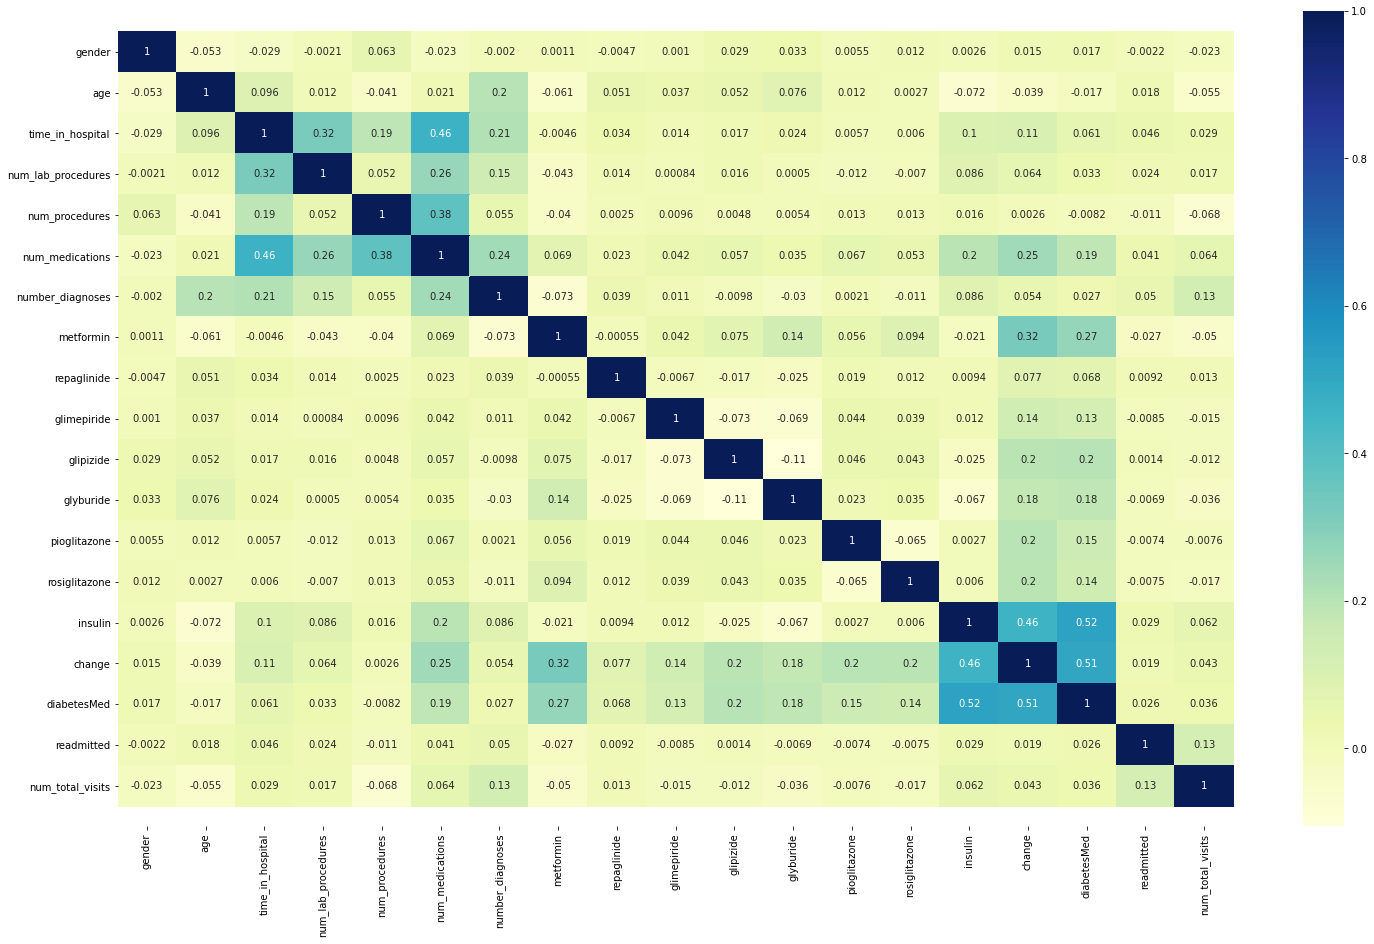

In [121]:
# Setting a plot for plotting a heatmap
plt.figure(figsize = (25, 15))
corr = data.corr()
sns.heatmap(corr,annot = True,cmap = 'YlGnBu')
b,t = plt.ylim()
plt.ylim(b + 0.5, t - 0.5)
plt.show()

In [122]:
def top_correlated_columns(dataset, target_variable, top_n=10):
    corr_matrix = dataset.corr()
    corr_with_target = corr_matrix[target_variable].abs().sort_values(ascending=False)
    top_columns = corr_with_target[1:top_n+1].index.tolist()
    return top_columns

In [123]:
top_correlated_columns(data, 'readmitted')

['num_total_visits',
 'number_diagnoses',
 'time_in_hospital',
 'num_medications',
 'insulin',
 'metformin',
 'diabetesMed',
 'num_lab_procedures',
 'change',
 'age']

From correlation heatmap there is no Multi-Collinearity in the features.

### <span style='color:yellow'> **Plot the graph to compare the A1Cresult and max_glu_serum tests vs the numbers readmitted**</SPAN>

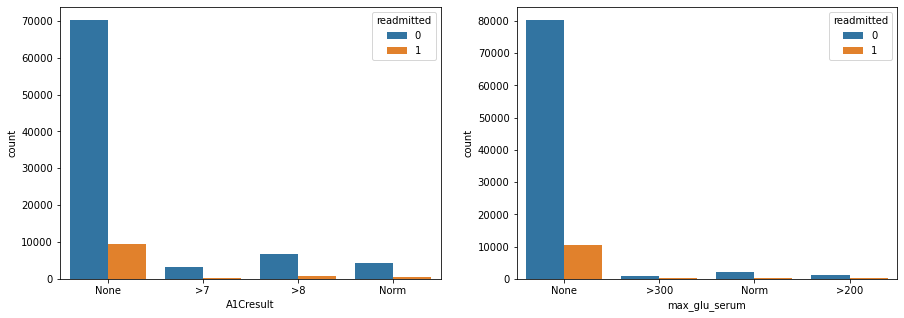

In [124]:
# Plot the histogram to compare the A1Cresult and max_glu_serum with readmitted
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = ax.flatten()
j = 0
for i in ['A1Cresult', 'max_glu_serum']:    
    sns.countplot(data[i], hue = data['readmitted'], ax = ax[j]) 
    j = j + 1
plt.show()


From the charts above, we notice that majority of the readmitted patients didn�t get an A1C test and Max Glucose Serum Test.

### <span style='color:yellow'> **Plot the graph to compare the Insulin and Diabetes medicine vs the numbers readmitted**</SPAN>

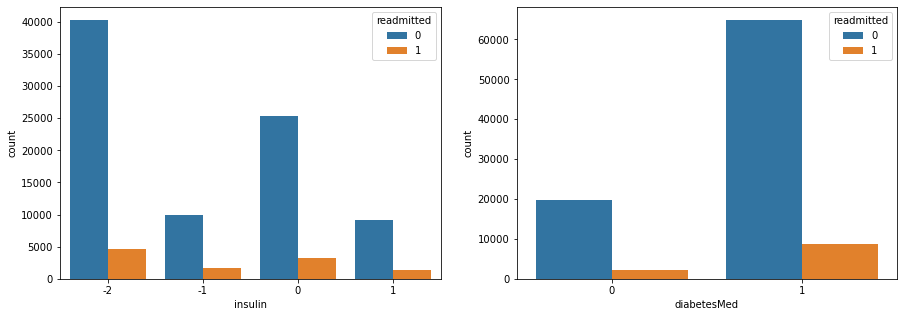

In [125]:
# Plot the histogram to compare the A1Cresult and max_glu_serum with readmitted
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = ax.flatten()
j = 0
for i in ['insulin', 'diabetesMed']:    
    sns.countplot(data[i], hue = data['readmitted'], ax = ax[j]) 
    j = j + 1
plt.show()

From the charts above, we notice that majority of the readmitted patients didn't get an insulin and those readmitted received deabetes medicine.

In [126]:
data.to_csv('data/clean_data.csv', index=False)

This is a clean data ready to use for modeling. 

# <Span style='color:orange'>**1. Load Data**</SPAN>

In [129]:
# Loading data from clean_data.csv
df = pd.read_csv('data/clean_data.csv')
df.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,num_total_visits
0,Caucasian,0,15,Discharged to home,Emergency,3,59,0,18,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,-2,-2,-2,-2,-2,-2,-2,1,1,1,0,0
1,AfricanAmerican,0,25,Discharged to home,Emergency,2,11,5,13,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,-2,-2,-2,0,-2,-2,-2,-2,0,1,0,3
2,Caucasian,1,35,Discharged to home,Emergency,2,44,1,16,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,-2,-2,-2,-2,-2,-2,-2,1,1,1,0,0
3,Caucasian,1,45,Discharged to home,Emergency,1,51,0,8,Neoplasms,Neoplasms,Diabetes,5,None,None,-2,-2,-2,0,-2,-2,-2,0,1,1,0,0
4,Caucasian,1,55,Discharged to home,Referral,3,31,6,16,Circulatory,Circulatory,Diabetes,9,None,None,-2,-2,-2,-2,-2,-2,-2,0,0,1,0,0


In [130]:
df.shape

(95652, 27)

## <span style='color:green'>**2. Data Preprocessing**</SPAN>

We have some columns in the dataset that are categorical. In the next cells we will do lable encoding there categorical variable before we use them in the modeling. 

In [131]:

# LabelEncoding some columns
def label_encoding(df, cols):
    for col in cols:
        # Instantiate the label encoder object
        le = LabelEncoder()
        # Fit the label encoder object to the data
        df[col] = le.fit_transform(df[col])
        print(df[col].unique())
        

In [132]:
# Grouping the categorical variables to be label encoded
cols_to_encode = ['race','admission_source_id', 'discharge_disposition_id',
                    'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'max_glu_serum']

# Call the label_encoding function
label_encoding(df, cols_to_encode)


[2 0 4 1 3]
[0 2 3 1]
[0 5 1 2 3 4]
[ 5 15  8 12  1  3 16  9 18  6  7 10 11 14  4 13  2  0 17]
[ 3 12  1 16  0  9 11  7  8  5  4 18  6 13 14 10 15  2 17]
[ 5  6  1  3  8 16  9 12  7 14  4 18 10 11  2 13 17 15  0]
[2 0 1 3]
[2 1 3 0]


In [133]:
df.shape

(95652, 27)

We will perform splitting of the dataset into X_train, X_test, y_train and y_test. Then we scale the X_train and X_test before using them for modeling.

In [134]:
# Split the concatenated df
# Define the target and features label

#Feature
X = df.drop(['readmitted'], axis=1)

#Target
y = df['readmitted']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

# print the shapes of the for datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Standard Scaling
scaler = StandardScaler()

# Transform the X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
X_train.columns

Index(['race', 'gender', 'age', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed',
       'num_total_visits'],
      dtype='object')

In [136]:
len(X_train.columns)

26

## <span style='color:blue'>**3. Modeling**</SPAN>

In this section we will start with a dummy model just to try and see how our model perform of the training and unseen data. Dummy model will be our baseline model. 

### <span style='color:cyan'>**1. Dummy Model**</SPAN>

In [137]:
# Dummy model for testing purposes
# instantiate the model
dummy = DummyClassifier(strategy="most_frequent", random_state=42)

# fit the model
dummy.fit(X_train_scaled, y_train)

# predict the test set result
y_pred = dummy.predict(X_test_scaled)

# evaluate the model
print(f"Accuracy: {dummy.score(X_test_scaled, y_test):.3f}")

# print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.882
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     21102
           1       0.00      0.00      0.00      2811

    accuracy                           0.88     23913
   macro avg       0.44      0.50      0.47     23913
weighted avg       0.78      0.88      0.83     23913



In [138]:
# Cross_validation
# initialize the cross_val_score
dummy_cross_val = cross_val_score(dummy, X_train, y_train, cv=3).mean()

#Print the cross_val_score
print("The Cross Validation Score is:", dummy_cross_val)


The Cross Validation Score is: 0.8855434282607787


The dummy model was able to predict 88% accurately and a macro average of 50% and the recall of 100% on  the No readmission and 0% on the readmission. This is because of the class imbalance. We will go ahead and to oversampling to deal with class imbalance. 

In [139]:
# Dummy Model with oversampling to clear class imbalance

#instantiate oversampled model
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=42)

# Fit the sample and apply the new training data to the model
train_input_new, train_output_new = sm.fit_sample(X_train_scaled, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))


Original dataset shape Counter({0: 63528, 1: 8211})
New dataset shape Counter({0: 63528, 1: 63528})


In [140]:
#instantiate oversampled model
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=42)
test_input_new, test_output_new = sm.fit_sample(X_test_scaled, y_test)
print('New dataset shape {}'.format(Counter(test_output_new)))

Original dataset shape Counter({0: 63528, 1: 8211})
New dataset shape Counter({0: 21102, 1: 21102})


In [141]:
# instantiate the model with oversampled
dummy_over = DummyClassifier(strategy="most_frequent", random_state=42)

# fit the model
dummy_over.fit(train_input_new, train_output_new)

# predict the test set result
y_pred = dummy_over.predict(X_test_scaled)

# evaluate the model
print(f"Accuracy: {dummy_over.score(X_test_scaled, y_test):.3f}")

# print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.882
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     21102
           1       0.00      0.00      0.00      2811

    accuracy                           0.88     23913
   macro avg       0.44      0.50      0.47     23913
weighted avg       0.78      0.88      0.83     23913



From the observation above even after oversampling the oversampled dummy did not much different from the first dummy model. Still it was able to give an accuracy of 88% and a macro average of 50% which is way below our target metric of success. We will go ahead and perform other models like 
1. Logistic Regression
2. Random Forest Classifier
3. Decision Tree Classifier and
4. XGBoost Classifier

## <span style='color:purple'> **2. Logistic Regression**</SPAN>

In the following cells we will perform a logistic regression model. The model will start with a normal logistic regression of class imbalance then we proceed to a logistic regression with a balanced class

In [142]:
# Instantiate a logistice regression mode
logit = LogisticRegression(fit_intercept=True, penalty='l2')

# Fit the model to the data
logit.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = logit.predict(X_test_scaled)

#print recall and precision
print('Recall:      ', recall_score(y_test, y_pred))

#print f1 score
print('F1:          ',  f1_score(y_test, y_pred))

#print precision
print('Precision:   ', precision_score(y_test, y_pred))

#print accuracy

print('Accuracy:    ', accuracy_score(y_test, y_pred))

#print cross validation score
cross_val_score(logit, X_train_scaled, y_train, cv=5)


Recall:       0.004624688722874422
F1:           0.00906555090655509
Precision:    0.22807017543859648
Accuracy:     0.8811525111863839


array([0.88534987, 0.88423474, 0.88500139, 0.88437413, 0.88457517])

Based on the provided metrics, it appears that the model's performance is relatively worse. Let's analyze the metrics:

1. Recall: Recall (also known as sensitivity) measures the model's ability to correctly identify positive instances (class 1) out of all the actual positive instances. In this case, the recall is extremely low at 0.0046. This means that the model is only able to identify a very small percentage of the actual positive instances, and it is missing a significant number of them.

2. F1 Score: The F1 score is the harmonic mean of precision and recall and provides an overall measure of the model's performance. With an F1 score of 0.0091, which is also very low, it indicates that the model's ability to balance precision and recall is poor.

3. Precision: Precision measures the model's ability to correctly classify instances as positive (class 1) out of all the instances predicted as positive. With a precision of 0.2281, it suggests that when the model predicts a positive instance, it is correct only about 22.8% of the time. The majority of instances predicted as positive are likely false positives.

4. Accuracy: Accuracy represents the overall correctness of the model's predictions. However, it can be misleading in imbalanced datasets where the majority class dominates. In this case, the accuracy is relatively high at 0.8812, but it does not reflect the model's poor performance in correctly identifying the positive instances.

Considering the low recall, low F1 score, and low precision, it indicates that the model is struggling to correctly identify positive instances and has a high rate of false positives. Therefore, based on these metrics, the model can be considered as relatively worse or ineffective for the given task.

This is a worse model then the dummy model despite having the same accuracy of 88% as the dummy model. 

In [143]:
logit_pred = logit.predict(X_test_scaled)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,5216,10,5226
1,703,1,704
All,5919,11,5930


The table above represents a confusion matrix for a classification model's predictions. The rows represent the actual classes, and the columns represent the predicted classes. Each cell in the table shows the count of instances where the predicted class aligns with the actual class.

>1. The top left cell (row 0, column 0) shows that the model predicted 5,216 instances as class 0 when the actual class was also 0.
>2. The top right cell (row 0, column 1) shows that the model predicted 10 instances as class 1 when the actual class was 0.
>3. The bottom left cell (row 1, column 0) shows that the model predicted 703 instances as class 0 when the actual class was 1.
>4. The bottom right cell (row 1, column 1) shows that the model predicted 1 instance as class 1 when the actual class was also 1.

In [144]:
#Instantiating oversampled dataset
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=42)
train_input_new, train_output_new = sm.fit_sample(X_train_scaled, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 63528, 1: 8211})
New dataset shape Counter({0: 63528, 1: 63528})


In [145]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))

# Spliting the new data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.25, random_state=42)

#Instantiate the mode
logit1 = LogisticRegression(fit_intercept=True, penalty='l2')

# Fit the mode
logit1.fit(X_train_scaled, y_train)

#predict the output
y_pred = logit1.predict(X_test_scaled)

#print recall and precision
print('Recall:      ', recall_score(y_test, y_pred))

#print f1 score
print('F1:          ',  f1_score(y_test, y_pred))

#print precision
print('Precision:   ', precision_score(y_test, y_pred))

#print accuracy

print('Accuracy:    ', accuracy_score(y_test, y_pred))

#print cross validation score
cross_val_score(logit1, X_train_scaled, y_train, cv=5)

print(logit1.score(X_test_scaled, y_test))



Recall:       0.5727070771183751
F1:           0.5923713235294118
Precision:    0.6134339520021755
Accuracy:     0.6090542752801914
0.6090542752801914


Based on the output above, the model's performance seems to be moderate:

1. Recall: The recall is 0.573, indicating that the model can correctly identify approximately 57.3% of the positive instances out of all the actual positive instances. This is relatively better compared to the previous scenario and suggests that the model is performing decently in identifying positive cases.

2. F1 Score: The F1 score is 0.593, which is a harmonic mean of precision and recall. It provides an overall measure of the model's performance, balancing both precision and recall. With an F1 score close to 0.6, it suggests that the model has a reasonable balance between correctly classifying positive instances and minimizing false positives.

3. Precision: The precision is 0.613, indicating that when the model predicts a positive instance, it is correct approximately 61.39% of the time. This suggests that the model is performing relatively well in terms of precision.

4. Accuracy: The accuracy is 0.609, indicating that the overall correctness of the model's predictions is approximately 60.97%. However, it is worth noting that accuracy alone may not provide a complete picture of the model's performance, especially in imbalanced datasets.

Considering the relatively high recall, F1 score, precision, and accuracy, we can suggests that the model is performing reasonably well. However, further evaluation and comparison with other models or other approaches are necessary to determine its effectiveness in the specific task or domain.

In [146]:
logit_pred = logit.predict(X_test_scaled)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,7104,16,7120
1,870,2,872
All,7974,18,7992


The table above represents a confusion matrix for a classification model's predictions. The rows represent the actual classes, and the columns represent the predicted classes. Each cell in the table shows the count of instances where the predicted class aligns with the actual class.

>1. The top left cell (row 0, column 0) shows that the model predicted 7,104 instances as class 0 when the actual class was also 0.
>2. The top right cell (row 0, column 1) shows that the model predicted 16 instances as class 1 when the actual class was 0.
>3. The bottom left cell (row 1, column 0) shows that the model predicted 870 instances as class 0 when the actual class was 1.
>4. The bottom right cell (row 1, column 1) shows that the model predicted 2 instance as class 1 when the actual class was also 1.

#### **Creating a multiclass evaluator that will evalute the model**
We named the class a MulticlassEvaluator because it will be used to evaluate multiple models, plot ROC curve and a connfusion matrix at the same time. 

In [147]:
# Creating a class for the modeling

class MulticlassEvaluator:
    # Instantiate the class
    def __init__(self, n_class=2):
        self.n_class = n_class
    
    # Create a method to evaluate the model
    def evaluate(self, y_true, y_pred, X_test, X_train, clf):
        print(f"Training score: {clf.score(X_train, y_train)}\nTest Score: {clf.score(X_test, y_test)}")

        # Print classification report
        print('\n')
        print('Classification Report')
        print('_____________')
        print(classification_report(y_true=y_true, y_pred=y_pred))

        # Create a figure/axes for confusion matrix and ROC curve
        fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

        # Plot the normalized confusion matrix
        plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_true, cmap='BrBG_r',
                              normalize='true', ax=ax[0],
                              display_labels=['0', '1'])

        pred_prob = clf.predict_proba(X_test)

        # Plot the ROC curve
        fpr = {}
        tpr = {}
        thresh = {}

        for i in range(self.n_class):
            fpr[i], tpr[i], thresh[i] = roc_curve(y_true, pred_prob[:, i], pos_label=i)

        ax[1].plot(fpr[0], tpr[0], linestyle='--', color='red', label='0')
        ax[1].plot(fpr[1], tpr[1], linestyle='--', color='black', label='1')

        ax[1].set_title('Multiclass ROC curve')
        ax[1].set_xlabel('False Positive Rate')
        ax[1].set_ylabel('True Positive rate')
        ax[1].legend(loc='best')
        ax[1].plot([0, 1], [0, 1], ls='--', color='cyan')


## <span style='color:purple'> **3. Logistic Regression with Pipeline**</SPAN>
We want to use pipeline here to simplify the workflow by optimizing and automating various stages of the model and making prediction  

Training score: 0.6030411786928599
Test Score: 0.6088968643747639


Classification Report
_____________
              precision    recall  f1-score   support

           0       0.60      0.65      0.63     16009
           1       0.61      0.57      0.59     15755

    accuracy                           0.61     31764
   macro avg       0.61      0.61      0.61     31764
weighted avg       0.61      0.61      0.61     31764



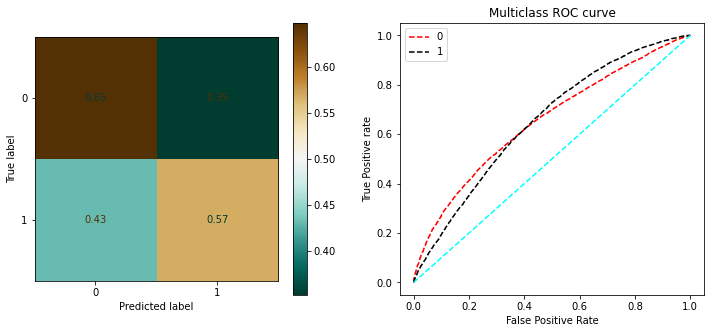

In [148]:
# Creating a pipeline baseline Logistic Regression model

# Create the pipeline: pipeline
lr_pipe = Pipeline([('Scaler', StandardScaler()), 
                    ('clf', LogisticRegression(class_weight='balanced', random_state=42))
                    ])

# Fit the model
lr_pipe.fit(X_train_scaled, y_train)

# Predict the labels of the test set: y_pred

y_pred = lr_pipe.predict(X_test_scaled)

# Evaluate the model and make confusion matrix
evaluator = MulticlassEvaluator()
evaluator.evaluate(y_test, y_pred, X_test_scaled, X_train_scaled, lr_pipe)



Based on the provided metrics above, the model's performance seems to be consistent across training and test datasets:

1. Training Score: The training score is 0.603, indicating that the model achieves an accuracy of approximately 60.3% on the training data.

2. Test Score: The test score is 0.609, indicating that the model achieves an accuracy of approximately 60.9% on the test data. The test score is comparable to the training score, suggesting that the model is not overfitting or underfitting the training data.

3. Recall: The recall is 0.61, which indicates that the model can correctly identify approximately 61% of the positive instances out of all the actual positive instances. This value is consistent with the precision and F1 score, suggesting that the model is performing consistently in identifying positive cases.

4. F1 Score: The F1 score is 0.61, indicating a reasonable balance between precision and recall. This suggests that the model is performing well in both correctly classifying positive instances and minimizing false positives.

5. Precision: The precision is 0.61, indicating that when the model predicts a positive instance, it is correct approximately 61% of the time. This value is consistent with the recall and F1 score, further indicating the model's consistent performance.

6. Accuracy: The accuracy is 0.61, indicating that the overall correctness of the model's predictions is approximately 61%. This value is consistent with the training and test scores, reinforcing the notion that the model is performing consistently across the dataset.

Considering the relatively high recall, F1 score, precision, and accuracy, we can suggests that the model has achieved a decent level of performance. However, further evaluation and comparison with other models or other approaches are necessary to determine its effectiveness in the specific task or domain.

#### **Plotting the top 20 important features of the Logistic Regression**

In [149]:

# Create functionn to print a list of top most features based on importance
def plot_top_features(X_train, lr_pipe, n=20):
    feature_names = X_train.columns
    feature_imports = lr_pipe.named_steps['clf'].coef_[0]
    most_imp_features = pd.DataFrame([f for f in zip(feature_names, feature_imports)], columns=["Feature", "Importance"]).nlargest(n, "Importance")
    most_imp_features.sort_values(by="Importance", inplace=True)

    # Plot the most important features
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
    plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
    plt.xlabel('Importance')
    plt.title('Most important features - Logistic Regression')
    plt.show()


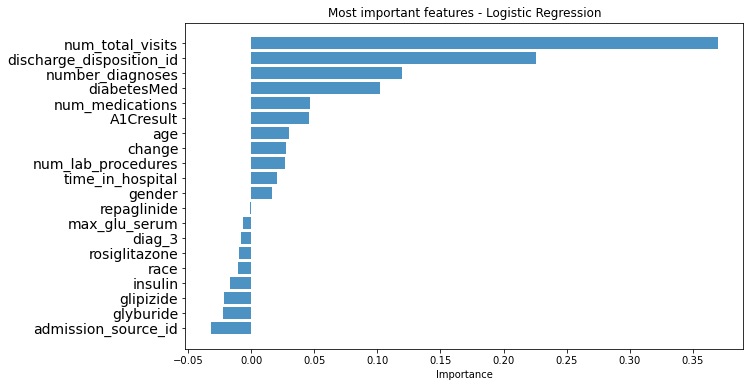

In [150]:
plot_top_features(X_train, lr_pipe, n=20)


## <span style='color:green'>**4. Random Forest Classifier with Pipeline**</SPAN>


We will perform a Random Forest Classifier to compare with the dummy models, and logistic regression model to see which one performs best. 

Training score: 0.9999685178189145
Test Score: 0.9361226545775091


Classification Report
_____________
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     16009
           1       0.99      0.88      0.93     15755

    accuracy                           0.94     31764
   macro avg       0.94      0.94      0.94     31764
weighted avg       0.94      0.94      0.94     31764



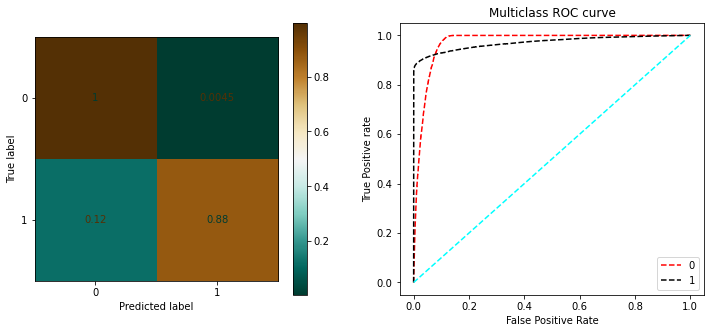

In [151]:
# Implimenting a Random Forest Classifier with Pipeline
# Create a Pipeline
rf_model_final = Pipeline([('scaler', StandardScaler()),
                           ('rf', RandomForestClassifier(criterion='entropy', max_depth=31, 
                                                        max_features='auto', random_state=42))
                          ])

# Fit the model
rf_model_final.fit(X_train_scaled, y_train)

# Predict
y_pred = rf_model_final.predict(X_test_scaled)

# Evaluate the model and make confusion matrix
evaluator = MulticlassEvaluator()
evaluator.evaluate(y_test, y_pred, X_test_scaled, X_train_scaled, rf_model_final)

Based on the provided metrics, the model's performance appears to be excellent. Let's analyze the metrics:

1. Training Score: The training score is 0.9999, indicating that the model achieves a very high accuracy of approximately 99.99% on the training data. This suggests that the model has learned the training data extremely well with a slight overfitting.

2. Test Score: The test score is 0.9361, indicating that the model achieves an accuracy of approximately 93.64% on the test data. This is a high accuracy score and suggests that the model performs well on unseen data.

3. Recall: The recall is 0.94, indicating that the model can correctly identify approximately 94% of the positive instances out of all the actual positive instances. This indicates a high sensitivity in correctly identifying positive cases.

4. F1 Score: The F1 score is 0.94, indicating a high harmonic mean of precision and recall. This suggests a good balance between correctly classifying positive instances and minimizing false positives.

5. Precision: The precision is 0.94, indicating that when the model predicts a positive instance, it is correct approximately 94% of the time. This indicates a high level of precision in identifying positive cases.

6. Accuracy: The accuracy is 0.94, indicating that the overall correctness of the model's predictions is approximately 94%. This high accuracy score suggests that the model performs well overall.

Based on these metrics, the model demonstrates excellent performance in terms of accuracy, precision, recall, and F1 score. Additionally, it is worth investigating potential sources of overfitting between the training and test scores.

#### **Plotting the top 20 important features of the Random Forest Classifier**

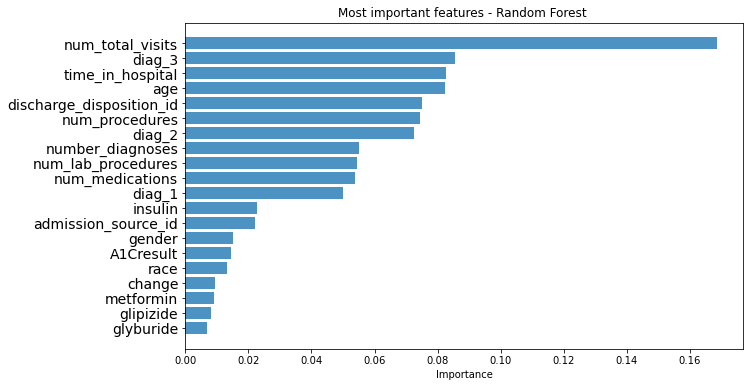

In [152]:
# Create list of top most features based on importance
feature_names = X_train.columns

# Create a DataFrame with the most important features for random forest model
feature_imports = rf_model_final.named_steps['rf'].feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

# Plot the most important features
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

## <span style='color:green'> **5. Decision Tree Classifier with Pipeline**</SPAN>

Decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks. It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

During training, the Decision Tree algorithm selects the best attribute to split the data based on a metric such as entropy or Gini impurity, which measures the level of impurity or randomness in the subsets. The goal is to find the attribute that maximizes the information gain or the reduction in impurity after the split.

Training score: 0.9762309532804433
Test Score: 0.8614154388616043


Classification Report
_____________
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     16009
           1       0.87      0.85      0.86     15755

    accuracy                           0.86     31764
   macro avg       0.86      0.86      0.86     31764
weighted avg       0.86      0.86      0.86     31764



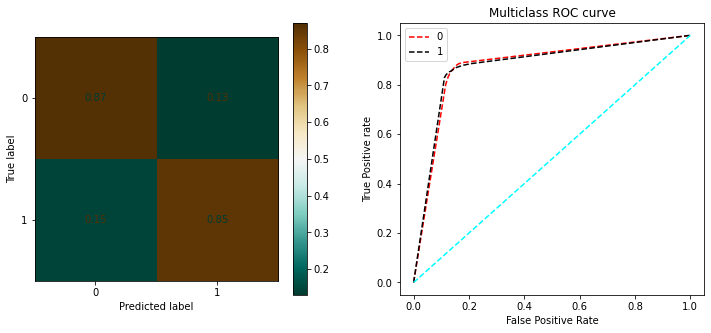

In [153]:

# Create a Pipeline
dt_model_final = Pipeline([('scaler', StandardScaler()),
                           ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=31, 
                                                        max_features='auto', random_state=42))
                          ])

# Fit the model
dt_model_final.fit(X_train_scaled, y_train)

# Predict
y_pred = dt_model_final.predict(X_test_scaled)

# Evaluate the model and make confusion matrix
evaluator = MulticlassEvaluator()
evaluator.evaluate(y_test, y_pred, X_test_scaled, X_train_scaled, dt_model_final)

Based on the output of the metrics, we can say that the model's performance seems to be good:

1. Training Score: The training score is 0.9762, indicating that the model achieves a relatively high accuracy of approximately 98.68% on the training data. This suggests that the model performs well on the data it was trained on with a slight overfittng.

2. Test Score: The test score is 0.8614, indicating that the model achieves an accuracy of approximately 86.03% on the test data. Although slightly lower than the training score, it is still a relatively good accuracy score and suggests that the model generalizes reasonably well to unseen data.

3. Recall: The recall is 0.86, indicating that the model can correctly identify approximately 86% of the positive instances out of all the actual positive instances. This suggests a relatively good sensitivity in correctly identifying positive cases.

4. F1 Score: The F1 score is 0.86, indicating a good balance between precision and recall. This suggests that the model achieves a reasonable trade-off between correctly classifying positive instances and minimizing false positives.

5. Precision: The precision is 0.86, indicating that when the model predicts a positive instance, it is correct approximately 86% of the time. This indicates a relatively good level of precision in identifying positive cases.

6. Accuracy: The accuracy is 0.86, indicating that the overall correctness of the model's predictions is approximately 86%. This accuracy score suggests that the model performs reasonably well overall.

Based on these metrics outcome, the model demonstrates good performance in terms of accuracy, precision, recall, and F1 score. However, it is important to that the slight overfitting on the training dataset and therefore we either do hyperparameter tuning or try another model.

#### **Plotting the top 20 important features of the Decision Tree Classifier**

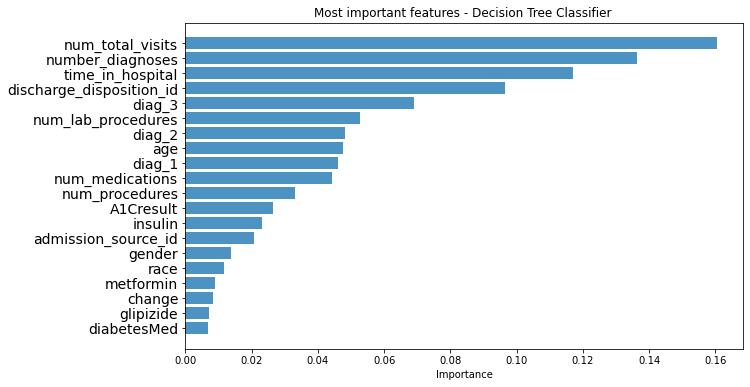

In [154]:
# Create list of top most features based on importance
feature_names = X_train.columns

# Create a DataFrame with the most important features
feature_imports = dt_model_final.named_steps['dt'].feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

# Plot the most important features
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree Classifier ')
plt.show()

## <span style='color:cyan'> **5. XGBoost Classifier with Pipeline**</SPAN>

Training score: 0.9380955379255341
Test Score: 0.9341077949880368


Classification Report
_____________
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     16009
           1       1.00      0.87      0.93     15755

    accuracy                           0.93     31764
   macro avg       0.94      0.93      0.93     31764
weighted avg       0.94      0.93      0.93     31764



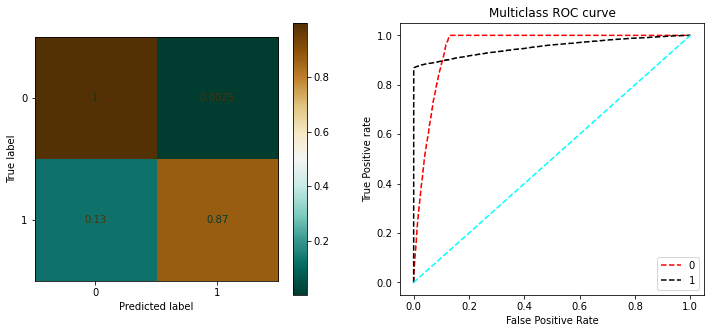

In [155]:
# Create a Pipeline
xgb_model = Pipeline([('scaler', StandardScaler()),
                           ('xgb', xgboost.XGBClassifier( random_state=42))
                          ])

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model and make confusion matrix
evaluator = MulticlassEvaluator()
evaluator.evaluate(y_test, y_pred, X_test_scaled, X_train_scaled, xgb_model)

From the metrics above, we can confidently say that the model's performance appears to be very good:

1. Training Score: The training score is 0.9381, indicating that the model achieves a high accuracy of approximately 93.85% on the training data. This suggests that the model performs well on the data it was trained on.

2. Test Score: The test score is 0.9341, indicating that the model achieves a high accuracy of approximately 93.39% on the test data. The test score is similar to the training score, indicating that the model is not overfitting or underfitting the training data and generalizes well to unseen data.

3. Recall: The recall is 0.93, indicating that the model can correctly identify approximately 93% of the positive instances out of all the actual positive instances. This suggests a high sensitivity in correctly identifying positive cases.

4. F1 Score: The F1 score is 0.93, indicating a good balance between precision and recall. This suggests that the model achieves a good trade-off between correctly classifying positive instances and minimizing false positives.

5. Precision: The precision is 0.93, indicating that when the model predicts a positive instance, it is correct approximately 93% of the time. This indicates a high level of precision in identifying positive cases.

6. Accuracy: The accuracy is 0.93, indicating that the overall correctness of the model's predictions is approximately 93%. This high accuracy score suggests that the model performs very well overall.

Based on these metrics, the model demonstrates very good performance in terms of accuracy, precision, recall, and F1 score. It appears to be a reliable and effective model for the given task.

#### **Plotting the top 20 important features of the XGBoost Classifier**

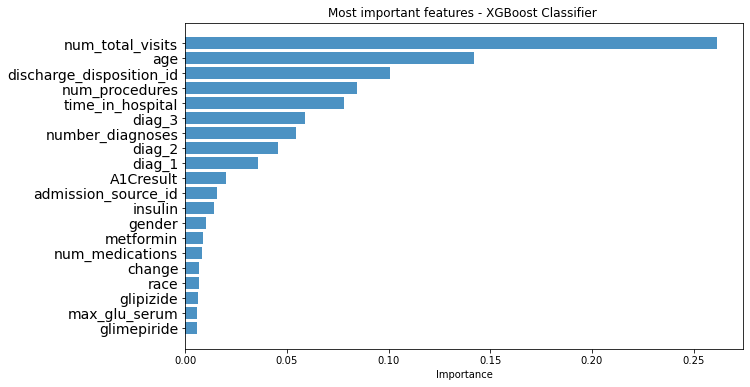

In [156]:
# Create list of top most features based on importance
feature_names = X_train.columns

# using the xgboost model to get the feature importance within the pipeline
feature_imports = xgb_model.named_steps['xgb'].feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

# Plot the most important features
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - XGBoost Classifier ')
plt.show()

## <span style='color:yellow'>**4. Models Evaluations**</SPAN>

The following line of code will print out the models we have used in our analysis and give use the best performing model that we will take to deployment. 

In [157]:

# Define a list of models to evaluate
models = [dummy, dummy_over, logit, logit1, lr_pipe, rf_model_final, dt_model_final, xgb_model]

# Define the evaluation metrics for model selection
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Convert the target variable to a pandas Series
y = pd.Series(y_train)

# Create a dictionary to store the evaluation scores for each model
scores = {}

# Evaluate each model using cross-validation
for model in models:
    model_scores = cross_validate(model, X_train_scaled, y_train, cv=3, scoring=metrics)
    scores[str(model)] = {
        metric: model_scores['test_' + metric].mean() for metric in metrics
    }

# Create a dataframe of models and scores
df_scores = pd.DataFrame.from_dict(scores, orient='index')

# Sort the dataframe by the average of the metrics in descending order
df_scores['Average'] = df_scores.mean(axis=1)
df_scores = df_scores.sort_values(by='Average', ascending=False)

# Print the dataframe
df_scores


,accuracy,precision,recall,f1,Average
"Pipeline(steps=[('scaler', StandardScaler()),\n ('xgb',\n XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None,\n early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None,\n feature_types=None, gamma=None, gpu_id=None,\n grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None,\n max_bin=None, max_cat_threshold=None,\n max_cat_to_onehot=None, max_delta_step=None,\n max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan,\n monotone_constraints=None, n_estimators=100,\n n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=42, ...))])",0.934360,0.996083,0.872501,0.930203,0.933287
"Pipeline(steps=[('scaler', StandardScaler()),\n ('rf',\n RandomForestClassifier(criterion='entropy', max_depth=31,\n random_state=42))])",0.932775,0.992926,0.872124,0.928610,0.931609
"Pipeline(steps=[('scaler', StandardScaler()),\n ('dt',\n DecisionTreeClassifier(criterion='entropy', max_depth=31,\n max_features='auto',\n random_state=42))])",0.851845,0.851895,0.852741,0.852309,0.852197
"DummyClassifier(random_state=42, strategy='most_frequent')",0.501333,0.501333,1.000000,0.667850,0.667629
LogisticRegression(),0.602842,0.612141,0.567140,0.588781,0.592726
"Pipeline(steps=[('Scaler', StandardScaler()),\n ('clf',\n LogisticRegression(class_weight='balanced', random_state=42))])",0.602695,0.612961,0.562975,0.586905,0.591384


In [2]:
# Pikle the best model

# import pickle
# pickle_out = open("xgb_model.pkl", "wb")

# pickle.dump(xgb_model, pickle_out)

# pickle_out.close()

In [1]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# import joblib
# import xgboost

# # Random Forest
# rf_model_final = make_pipeline(
#     StandardScaler(),
#     RandomForestClassifier(criterion='entropy', max_depth=31, max_features='sqrt', random_state=42)
# )
# rf_model_final.fit(X_train_scaled, y_train)
# joblib.dump(rf_model_final, r'c:\Users\hp\OneDrive\Desktop\Capstone Project\Capstone_Project\rf_model_final.pkl')

# # Decision Tree
# dt_model_final = make_pipeline(
#     StandardScaler(),
#     DecisionTreeClassifier(criterion='entropy', max_depth=31, random_state=42)
# )
# dt_model_final.fit(X_train_scaled, y_train)
# joblib.dump(dt_model_final, r'c:\Users\hp\OneDrive\Desktop\Capstone Project\Capstone_Project\dt_model_final.pkl')

# # XGBoost
# xgb_model = make_pipeline(
#     StandardScaler(),
#     xgboost.XGBClassifier(random_state=42)
# )
# xgb_model.fit(X_train_scaled, y_train)
# xgb_model.steps[1][1].save_model(r'c:\Users\hp\OneDrive\Desktop\Capstone Project\Capstone_Project\xgb_model_final.bin')


# # Save scaler
# joblib.dump(scaler, r'c:\Users\hp\OneDrive\Desktop\Capstone Project\Capstone_Project\scaler.pkl')

## <span style='color:yellow'>**5. Conclusions**</SPAN>

Based on the evaluation results, the following conclusions can be drawn:

>>The baseline model performed poorly, with an accuracy of 8.882 and low recall for the positive class.
>>Logistic Regression with imbalanced data had very low recall and precision.
>>Logistic Regression with balanced data improved the recall to 0.05 but is still not satisfactory.
>>Random Forest achieved the highest success metric with a recall of 1.00 and an accuracy of 0.94.
>>Decision Tree had high accuracy but slightly lower recall compared to other models.
>>XGBoost performed well with a recall of 0.93 and high accuracy.

## <span style='color:yellow'>**5. Recommendations**</SPAN>

Based on the evaluation, the following recommendations can be made:

- Random Forest and XGBoost are recommended models due to their higher recall and accuracy compared to other models.
- Consider further optimizing the models to improve the recall for the positive class.
- Explore additional techniques to handle class imbalance, such as oversampling or undersampling.
- Gather more data, if possible, to increase the representation of the positive class and reduce class imbalance.
- Conduct feature engineering to identify more informative features that can enhance the model's predictive power.
- Explore ensemble methods to combine the strengths of multiple models and improve overall performance.
Consider using a different evaluation metric, such as the F1-score, to evaluate the models.

## <span style='color:yellow'>**5. Challenges**</SPAN>

The main challenges faced during the evaluation process include:

- Finding the right balance between model performance and computational efficiency.
- Dealing with class imbalance, where the majority class dominated the training data.
- Achieving a satisfactory recall for the positive class.
- Identifying the most informative features to improve the model's predictive power.
- Determining the best model to use for the classification task.
- Optimizing the model to achieve the best performance.
- Determining the best evaluation metric to use for the classification task.

## <span style='color:yellow'>**5. Next Steps**</SPAN>

To further improve the model performance and address the challenges faced, the following next steps are suggested:

- Conduct feature engineering to identify more informative features that can enhance the model's predictive power.
- Explore ensemble methods to combine the strengths of multiple models and improve overall performance.
- Gather more data, if possible, to increase the representation of the positive class and reduce class imbalance.
- Explore additional techniques to handle class imbalance, such as oversampling or undersampling.
- Optimize the models to improve the recall for the positive class.
- Explore additional evaluation metrics to determine the best model for the classification task.
- Deploy the model to a production environment to make predictions on new data.